# **Activity 3**

##### Written by: Atinon, Denosta, Pacificar

##  **I. Data Cleaning**

#### **1. Importing all the necessary Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### **2. Loading the Dataset and Displaying it**

In [ ]:
dataset = pd.read_csv('./gender_statistics_2.csv')
dataset.head()

,Series Name,Series Code,Country Name,Country Code,1960 [YR1960],1961 [YR1961],1962 [YR1962],1963 [YR1963],1964 [YR1964],1965 [YR1965],...,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021]
0,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,United States,USA,..,..,..,..,..,..,...,7.88700008392334,7.06899976730347,6.06199979782104,5.17799997329712,4.78900003433228,4.31199979782104,3.84100008010864,3.61100006103516,8.34500026702881,5.25299978256226
1,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,Philippines,PHL,..,..,..,..,..,..,...,3.72499990463257,3.82200002670288,3.72099995613098,3.22099995613098,2.85199999809265,2.69799995422363,2.67700004577637,2.53200006484985,2.71399998664856,2.66799998283386
2,"Unemployment, male (% of male labor force) (mo...",SL.UEM.TOTL.MA.ZS,United States,USA,..,..,..,..,..,..,...,8.22700023651123,7.62799978256226,6.26200008392334,5.36700010299683,4.93900012969971,4.40199995040894,3.95099997520447,3.72099995613098,7.7960000038147,5.64599990844727
3,"Unemployment, male (% of male labor force) (mo...",SL.UEM.TOTL.MA.ZS,Philippines,PHL,..,..,..,..,..,..,...,3.35500001907349,3.29099988937378,3.52099990844727,2.97099995613098,2.60199999809265,2.45799994468689,2.12700009346008,2.05100011825562,2.39499998092651,2.23600006103516
4,"Employment to population ratio, 15+, female (%...",SL.EMP.TOTL.SP.FE.ZS,United States,USA,..,..,..,..,..,..,...,52.2980003356934,52.3339996337891,52.693000793457,52.9259986877441,53.2589988708496,53.7620010375977,54.0769996643066,54.5530014038086,50.7680015563965,52.326000213623


#### **3. Making a Code List**

In [ ]:
dataset['Series Code'].unique()

array(['SL.UEM.TOTL.FE.ZS', 'SL.UEM.TOTL.MA.ZS', 'SL.EMP.TOTL.SP.FE.ZS',
       'SL.EMP.TOTL.SP.MA.ZS', 'fin2.t.a.2', 'fin2.t.a.1',
       'SE.TER.CUAT.BA.FE.ZS', 'SE.TER.CUAT.BA.MA.ZS', nan], dtype=object)

In [ ]:
code_list = [
    'SL.EMP.TOTL.SP.FE.ZS',
    'SL.EMP.TOTL.SP.MA.ZS',
    'SL.UEM.TOTL.MA.ZS',
    'SL.UEM.TOTL.FE.ZS',
    'SE.TER.CUAT.BA.MA.ZS',
    'SE.TER.CUAT.BA.FE.ZS',
    'fin2.t.a.2',
    'fin2.t.a.1'
]
code_list

['SL.EMP.TOTL.SP.FE.ZS',
 'SL.EMP.TOTL.SP.MA.ZS',
 'SL.UEM.TOTL.MA.ZS',
 'SL.UEM.TOTL.FE.ZS',
 'SE.TER.CUAT.BA.MA.ZS',
 'SE.TER.CUAT.BA.FE.ZS',
 'fin2.t.a.2',
 'fin2.t.a.1']

#### **4. Masking the Data, Identifying the Data Atributes and Dropping the Country Code**

In [ ]:
mask = dataset['Series Code'].isin(code_list)
masked_data = dataset[mask]
masked_data.shape

(16, 66)

In [ ]:
## Identify Data Attributes
## The Attributes:
    #Series Name
    #Series Code
    #Country Name
    #Country Code
    #Years
dataset_cat_df = dataset.select_dtypes(include=['object'])
dataset_num_df = dataset.select_dtypes(include=['object'])

def printColumnTypes(non_numeric_df, numeric_df):
    '''separates non-numeric and numeric columns'''
    print ("Non-Numeric columns:")

    for col in non_numeric_df:
        print(f"{col}")
    print("")

    print ("Numeric columns:")
    for col in numeric_df:
        print(f"{col}")
printColumnTypes(dataset_cat_df, dataset_num_df)

Non-Numeric columns:
Series Name
Series Code
Country Name
Country Code
1960 [YR1960]
1961 [YR1961]
1962 [YR1962]
1963 [YR1963]
1964 [YR1964]
1965 [YR1965]
1966 [YR1966]
1967 [YR1967]
1968 [YR1968]
1969 [YR1969]
1970 [YR1970]
1971 [YR1971]
1972 [YR1972]
1973 [YR1973]
1974 [YR1974]
1975 [YR1975]
1976 [YR1976]
1977 [YR1977]
1978 [YR1978]
1979 [YR1979]
1980 [YR1980]
1981 [YR1981]
1982 [YR1982]
1983 [YR1983]
1984 [YR1984]
1985 [YR1985]
1986 [YR1986]
1987 [YR1987]
1988 [YR1988]
1989 [YR1989]
1990 [YR1990]
1991 [YR1991]
1992 [YR1992]
1993 [YR1993]
1994 [YR1994]
1995 [YR1995]
1996 [YR1996]
1997 [YR1997]
1998 [YR1998]
1999 [YR1999]
2000 [YR2000]
2001 [YR2001]
2002 [YR2002]
2003 [YR2003]
2004 [YR2004]
2005 [YR2005]
2006 [YR2006]
2007 [YR2007]
2008 [YR2008]
2009 [YR2009]
2010 [YR2010]
2011 [YR2011]
2012 [YR2012]
2013 [YR2013]
2014 [YR2014]
2015 [YR2015]
2016 [YR2016]
2017 [YR2017]
2018 [YR2018]
2019 [YR2019]
2020 [YR2020]
2021 [YR2021]

Numeric columns:
Series Name
Series Code
Country Name
Countr

In [ ]:
## Masking for all
# Set the year as numerila data type - convert year string to numbers
# drop the column 'country_name'

masked_data.columns = ['series_name', 'series_code',
                       'country_name', 'country_code',
                        '1960', '1961', '1962', '1963', '1964',
                        '1965', '1966', '1967', '1968', '1969',
                        '1970', '1971',
                        '1972', '1973', '1974', '1975', '1976',
                        '1977', '1978', '1979', '1980', '1981',
                        '1982', '1983', '1984', '1985', '1986',
                        '1987', '1988', '1989', '1990', '1991',
                        '1992', '1993', '1994', '1995', '1996',
                        '1997', '1998', '1999', '2000', '2001',
                        '2002', '2003', '2004', '2005', '2006',
                        '2007', '2008', '2009', '2010', '2011',
                        '2012', '2013', '2014', '2015', '2016',
                        '2017', '2018', '2019', '2020', '2021']
# masked_data = masked_data.drop('country_name', axis=1)

In [ ]:
masked_data

,series_name,series_code,country_name,country_code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,United States,USA,..,..,..,..,..,..,...,7.88700008392334,7.06899976730347,6.06199979782104,5.17799997329712,4.78900003433228,4.31199979782104,3.84100008010864,3.61100006103516,8.34500026702881,5.25299978256226
1,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,Philippines,PHL,..,..,..,..,..,..,...,3.72499990463257,3.82200002670288,3.72099995613098,3.22099995613098,2.85199999809265,2.69799995422363,2.67700004577637,2.53200006484985,2.71399998664856,2.66799998283386
2,"Unemployment, male (% of male labor force) (mo...",SL.UEM.TOTL.MA.ZS,United States,USA,..,..,..,..,..,..,...,8.22700023651123,7.62799978256226,6.26200008392334,5.36700010299683,4.93900012969971,4.40199995040894,3.95099997520447,3.72099995613098,7.7960000038147,5.64599990844727
3,"Unemployment, male (% of male labor force) (mo...",SL.UEM.TOTL.MA.ZS,Philippines,PHL,..,..,..,..,..,..,...,3.35500001907349,3.29099988937378,3.52099990844727,2.97099995613098,2.60199999809265,2.45799994468689,2.12700009346008,2.05100011825562,2.39499998092651,2.23600006103516
4,"Employment to population ratio, 15+, female (%...",SL.EMP.TOTL.SP.FE.ZS,United States,USA,..,..,..,..,..,..,...,52.2980003356934,52.3339996337891,52.693000793457,52.9259986877441,53.2589988708496,53.7620010375977,54.0769996643066,54.5530014038086,50.7680015563965,52.326000213623
5,"Employment to population ratio, 15+, female (%...",SL.EMP.TOTL.SP.FE.ZS,Philippines,PHL,..,..,..,..,..,..,...,46.5359992980957,46.3979988098145,47.1990013122559,47.0250015258789,46.7480010986328,43.7669982910156,44.2509994506836,45.3250007629395,41.4630012512207,42.6660003662109
6,"Employment to population ratio, 15+, male (%) ...",SL.EMP.TOTL.SP.MA.ZS,United States,USA,..,..,..,..,..,..,...,63.2389984130859,63.2789993286133,63.75,64.2129974365234,64.6460037231445,64.9130020141602,65.2200012207031,65.4879989624023,61.3779983520508,62.6860008239746
7,"Employment to population ratio, 15+, male (%) ...",SL.EMP.TOTL.SP.MA.ZS,Philippines,PHL,..,..,..,..,..,..,...,72.6510009765625,72.2669982910156,72.745002746582,72.1129989624023,73.2129974365234,71.6139984130859,71.0609970092773,71.0019989013672,65.3870010375977,66.7750015258789
8,"Debit card ownership, female (% age 15+)",fin2.t.a.2,United States,USA,..,..,..,..,..,..,...,..,..,76.366096496582,..,..,79.0866775512695,..,..,..,..
9,"Debit card ownership, female (% age 15+)",fin2.t.a.2,Philippines,PHL,..,..,..,..,..,..,...,..,..,25.3472557067871,..,..,18.7377338409424,..,..,..,..


In [ ]:
masked_data_cat_df = masked_data.select_dtypes(include=['object'])
masked_data_num_df = masked_data.select_dtypes(include=['object'])

def printColumnTypes(non_numeric_df, numeric_df):
    '''separates non-numeric and numeric columns'''
    print ("Non-Numeric columns:")

    for col in non_numeric_df:
        print(f"{col}")
    print("")

    print ("Numeric columns:")
    for col in numeric_df:
        print(f"{col}")
printColumnTypes(masked_data_cat_df, masked_data_num_df)

Non-Numeric columns:
series_name
series_code
country_name
country_code
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021

Numeric columns:
series_name
series_code
country_name
country_code
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021


#### **5. Handle Missing Values**

In [ ]:
# Replace null values with NaN and check the values with null value
masked_data.replace('..', np.nan, inplace=True)
masked_data.isna()

/tmp/ipykernel_8176/1832482139.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  masked_data.replace('..', np.nan, inplace=True)


,series_name,series_code,country_name,country_code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,False,False,False,False,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,True,True,True,True,True,True,...,True,True,False,True,True,False,True,True,True,True
9,False,False,False,False,True,True,True,True,True,True,...,True,True,False,True,True,False,True,True,True,True


In [ ]:
# Drop the columns with all the vlaues missing
masked_data.dropna(axis=1, how='all', inplace=True)
masked_data

/tmp/ipykernel_8176/2391561288.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  masked_data.dropna(axis=1, how='all', inplace=True)


,series_name,series_code,country_name,country_code,1991,1992,1993,1994,1995,1996,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,United States,USA,6.3600001335144,7.00299978256226,6.57100009918213,6.05399990081787,5.67199993133545,5.46600008010864,...,7.88700008392334,7.06899976730347,6.06199979782104,5.17799997329712,4.78900003433228,4.31199979782104,3.84100008010864,3.61100006103516,8.34500026702881,5.25299978256226
1,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,Philippines,PHL,4.06899976730347,4.04300022125244,3.98900008201599,3.92000007629395,3.91799998283386,3.88700008392334,...,3.72499990463257,3.82200002670288,3.72099995613098,3.22099995613098,2.85199999809265,2.69799995422363,2.67700004577637,2.53200006484985,2.71399998664856,2.66799998283386
2,"Unemployment, male (% of male labor force) (mo...",SL.UEM.TOTL.MA.ZS,United States,USA,7.15500020980835,7.90399980545044,7.16900014877319,6.17500019073486,5.63199996948242,5.43599987030029,...,8.22700023651123,7.62799978256226,6.26200008392334,5.36700010299683,4.93900012969971,4.40199995040894,3.95099997520447,3.72099995613098,7.7960000038147,5.64599990844727
3,"Unemployment, male (% of male labor force) (mo...",SL.UEM.TOTL.MA.ZS,Philippines,PHL,3.59899997711182,3.57100009918213,3.51600003242493,3.44899988174438,3.44199991226196,3.40899991989136,...,3.35500001907349,3.29099988937378,3.52099990844727,2.97099995613098,2.60199999809265,2.45799994468689,2.12700009346008,2.05100011825562,2.39499998092651,2.23600006103516
4,"Employment to population ratio, 15+, female (%...",SL.EMP.TOTL.SP.FE.ZS,United States,USA,52.8400001525879,52.9539985656738,53.3079986572266,54.4370002746582,54.8440017700195,55.2480010986328,...,52.2980003356934,52.3339996337891,52.693000793457,52.9259986877441,53.2589988708496,53.7620010375977,54.0769996643066,54.5530014038086,50.7680015563965,52.326000213623
5,"Employment to population ratio, 15+, female (%...",SL.EMP.TOTL.SP.FE.ZS,Philippines,PHL,45.4179992675781,45.5110015869141,45.5530014038086,45.5200004577637,45.4459991455078,45.3470001220703,...,46.5359992980957,46.3979988098145,47.1990013122559,47.0250015258789,46.7480010986328,43.7669982910156,44.2509994506836,45.3250007629395,41.4630012512207,42.6660003662109
6,"Employment to population ratio, 15+, male (%) ...",SL.EMP.TOTL.SP.MA.ZS,United States,USA,69.1149978637695,68.6220016479492,68.7829971313477,69.2809982299805,69.6190032958984,69.745002746582,...,63.2389984130859,63.2789993286133,63.75,64.2129974365234,64.6460037231445,64.9130020141602,65.2200012207031,65.4879989624023,61.3779983520508,62.6860008239746
7,"Employment to population ratio, 15+, male (%) ...",SL.EMP.TOTL.SP.MA.ZS,Philippines,PHL,72.9759979248047,73.052001953125,73.1080017089844,73.125,73.0869979858398,73.0419998168945,...,72.6510009765625,72.2669982910156,72.745002746582,72.1129989624023,73.2129974365234,71.6139984130859,71.0609970092773,71.0019989013672,65.3870010375977,66.7750015258789
8,"Debit card ownership, female (% age 15+)",fin2.t.a.2,United States,USA,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,76.366096496582,NaN,NaN,79.0866775512695,NaN,NaN,NaN,NaN
9,"Debit card ownership, female (% age 15+)",fin2.t.a.2,Philippines,PHL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,25.3472557067871,NaN,NaN,18.7377338409424,NaN,NaN,NaN,NaN


In [ ]:
masked_data.isna().sum().sum()

216

In [ ]:
# Fill the rows infected based on the average threshold
masked_data = masked_data.dropna(thresh=3*0.3, axis='rows')
masked_data = masked_data.fillna(method='bfill', axis=1)
masked_data  = masked_data.fillna(method='ffill', axis=1)
masked_data

,series_name,series_code,country_name,country_code,1991,1992,1993,1994,1995,1996,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,United States,USA,6.3600001335144,7.00299978256226,6.57100009918213,6.05399990081787,5.67199993133545,5.46600008010864,...,7.88700008392334,7.06899976730347,6.06199979782104,5.17799997329712,4.78900003433228,4.31199979782104,3.84100008010864,3.61100006103516,8.34500026702881,5.25299978256226
1,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,Philippines,PHL,4.06899976730347,4.04300022125244,3.98900008201599,3.92000007629395,3.91799998283386,3.88700008392334,...,3.72499990463257,3.82200002670288,3.72099995613098,3.22099995613098,2.85199999809265,2.69799995422363,2.67700004577637,2.53200006484985,2.71399998664856,2.66799998283386
2,"Unemployment, male (% of male labor force) (mo...",SL.UEM.TOTL.MA.ZS,United States,USA,7.15500020980835,7.90399980545044,7.16900014877319,6.17500019073486,5.63199996948242,5.43599987030029,...,8.22700023651123,7.62799978256226,6.26200008392334,5.36700010299683,4.93900012969971,4.40199995040894,3.95099997520447,3.72099995613098,7.7960000038147,5.64599990844727
3,"Unemployment, male (% of male labor force) (mo...",SL.UEM.TOTL.MA.ZS,Philippines,PHL,3.59899997711182,3.57100009918213,3.51600003242493,3.44899988174438,3.44199991226196,3.40899991989136,...,3.35500001907349,3.29099988937378,3.52099990844727,2.97099995613098,2.60199999809265,2.45799994468689,2.12700009346008,2.05100011825562,2.39499998092651,2.23600006103516
4,"Employment to population ratio, 15+, female (%...",SL.EMP.TOTL.SP.FE.ZS,United States,USA,52.8400001525879,52.9539985656738,53.3079986572266,54.4370002746582,54.8440017700195,55.2480010986328,...,52.2980003356934,52.3339996337891,52.693000793457,52.9259986877441,53.2589988708496,53.7620010375977,54.0769996643066,54.5530014038086,50.7680015563965,52.326000213623
5,"Employment to population ratio, 15+, female (%...",SL.EMP.TOTL.SP.FE.ZS,Philippines,PHL,45.4179992675781,45.5110015869141,45.5530014038086,45.5200004577637,45.4459991455078,45.3470001220703,...,46.5359992980957,46.3979988098145,47.1990013122559,47.0250015258789,46.7480010986328,43.7669982910156,44.2509994506836,45.3250007629395,41.4630012512207,42.6660003662109
6,"Employment to population ratio, 15+, male (%) ...",SL.EMP.TOTL.SP.MA.ZS,United States,USA,69.1149978637695,68.6220016479492,68.7829971313477,69.2809982299805,69.6190032958984,69.745002746582,...,63.2389984130859,63.2789993286133,63.75,64.2129974365234,64.6460037231445,64.9130020141602,65.2200012207031,65.4879989624023,61.3779983520508,62.6860008239746
7,"Employment to population ratio, 15+, male (%) ...",SL.EMP.TOTL.SP.MA.ZS,Philippines,PHL,72.9759979248047,73.052001953125,73.1080017089844,73.125,73.0869979858398,73.0419998168945,...,72.6510009765625,72.2669982910156,72.745002746582,72.1129989624023,73.2129974365234,71.6139984130859,71.0609970092773,71.0019989013672,65.3870010375977,66.7750015258789
8,"Debit card ownership, female (% age 15+)",fin2.t.a.2,United States,USA,65.8333587646484,65.8333587646484,65.8333587646484,65.8333587646484,65.8333587646484,65.8333587646484,...,76.366096496582,76.366096496582,76.366096496582,79.0866775512695,79.0866775512695,79.0866775512695,79.0866775512695,79.0866775512695,79.0866775512695,79.0866775512695
9,"Debit card ownership, female (% age 15+)",fin2.t.a.2,Philippines,PHL,16.4146709442139,16.4146709442139,16.4146709442139,16.4146709442139,16.4146709442139,16.4146709442139,...,25.3472557067871,25.3472557067871,25.3472557067871,18.7377338409424,18.7377338409424,18.7377338409424,18.7377338409424,18.7377338409424,18.7377338409424,18.7377338409424


In [ ]:
# Check how many columns still have null values
masked_data.isna().sum()

series_name     0
series_code     0
country_name    0
country_code    0
1991            0
1992            0
1993            0
1994            0
1995            0
1996            0
1997            0
1998            0
1999            0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013            0
2014            0
2015            0
2016            0
2017            0
2018            0
2019            0
2020            0
2021            0
dtype: int64

In [ ]:
# Drop the columns with null values
masked_data.dropna(axis=1, how='any', inplace=True)
masked_data

,series_name,series_code,country_name,country_code,1991,1992,1993,1994,1995,1996,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,United States,USA,6.3600001335144,7.00299978256226,6.57100009918213,6.05399990081787,5.67199993133545,5.46600008010864,...,7.88700008392334,7.06899976730347,6.06199979782104,5.17799997329712,4.78900003433228,4.31199979782104,3.84100008010864,3.61100006103516,8.34500026702881,5.25299978256226
1,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,Philippines,PHL,4.06899976730347,4.04300022125244,3.98900008201599,3.92000007629395,3.91799998283386,3.88700008392334,...,3.72499990463257,3.82200002670288,3.72099995613098,3.22099995613098,2.85199999809265,2.69799995422363,2.67700004577637,2.53200006484985,2.71399998664856,2.66799998283386
2,"Unemployment, male (% of male labor force) (mo...",SL.UEM.TOTL.MA.ZS,United States,USA,7.15500020980835,7.90399980545044,7.16900014877319,6.17500019073486,5.63199996948242,5.43599987030029,...,8.22700023651123,7.62799978256226,6.26200008392334,5.36700010299683,4.93900012969971,4.40199995040894,3.95099997520447,3.72099995613098,7.7960000038147,5.64599990844727
3,"Unemployment, male (% of male labor force) (mo...",SL.UEM.TOTL.MA.ZS,Philippines,PHL,3.59899997711182,3.57100009918213,3.51600003242493,3.44899988174438,3.44199991226196,3.40899991989136,...,3.35500001907349,3.29099988937378,3.52099990844727,2.97099995613098,2.60199999809265,2.45799994468689,2.12700009346008,2.05100011825562,2.39499998092651,2.23600006103516
4,"Employment to population ratio, 15+, female (%...",SL.EMP.TOTL.SP.FE.ZS,United States,USA,52.8400001525879,52.9539985656738,53.3079986572266,54.4370002746582,54.8440017700195,55.2480010986328,...,52.2980003356934,52.3339996337891,52.693000793457,52.9259986877441,53.2589988708496,53.7620010375977,54.0769996643066,54.5530014038086,50.7680015563965,52.326000213623
5,"Employment to population ratio, 15+, female (%...",SL.EMP.TOTL.SP.FE.ZS,Philippines,PHL,45.4179992675781,45.5110015869141,45.5530014038086,45.5200004577637,45.4459991455078,45.3470001220703,...,46.5359992980957,46.3979988098145,47.1990013122559,47.0250015258789,46.7480010986328,43.7669982910156,44.2509994506836,45.3250007629395,41.4630012512207,42.6660003662109
6,"Employment to population ratio, 15+, male (%) ...",SL.EMP.TOTL.SP.MA.ZS,United States,USA,69.1149978637695,68.6220016479492,68.7829971313477,69.2809982299805,69.6190032958984,69.745002746582,...,63.2389984130859,63.2789993286133,63.75,64.2129974365234,64.6460037231445,64.9130020141602,65.2200012207031,65.4879989624023,61.3779983520508,62.6860008239746
7,"Employment to population ratio, 15+, male (%) ...",SL.EMP.TOTL.SP.MA.ZS,Philippines,PHL,72.9759979248047,73.052001953125,73.1080017089844,73.125,73.0869979858398,73.0419998168945,...,72.6510009765625,72.2669982910156,72.745002746582,72.1129989624023,73.2129974365234,71.6139984130859,71.0609970092773,71.0019989013672,65.3870010375977,66.7750015258789
8,"Debit card ownership, female (% age 15+)",fin2.t.a.2,United States,USA,65.8333587646484,65.8333587646484,65.8333587646484,65.8333587646484,65.8333587646484,65.8333587646484,...,76.366096496582,76.366096496582,76.366096496582,79.0866775512695,79.0866775512695,79.0866775512695,79.0866775512695,79.0866775512695,79.0866775512695,79.0866775512695
9,"Debit card ownership, female (% age 15+)",fin2.t.a.2,Philippines,PHL,16.4146709442139,16.4146709442139,16.4146709442139,16.4146709442139,16.4146709442139,16.4146709442139,...,25.3472557067871,25.3472557067871,25.3472557067871,18.7377338409424,18.7377338409424,18.7377338409424,18.7377338409424,18.7377338409424,18.7377338409424,18.7377338409424


In [ ]:
# Check how many columns still have null values
masked_data.isna().sum()

series_name     0
series_code     0
country_name    0
country_code    0
1991            0
1992            0
1993            0
1994            0
1995            0
1996            0
1997            0
1998            0
1999            0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013            0
2014            0
2015            0
2016            0
2017            0
2018            0
2019            0
2020            0
2021            0
dtype: int64

In [ ]:
# Handle Different Groups of Inforamtion
# Employment
# Unemployment
# Debit/Assets
# Bachelor's Educational Attainment

In [ ]:
masked_data.series_name.value_counts()

Unemployment, female (% of female labor force) (modeled ILO estimate)                                 2
Unemployment, male (% of male labor force) (modeled ILO estimate)                                     2
Employment to population ratio, 15+, female (%) (modeled ILO estimate)                                2
Employment to population ratio, 15+, male (%) (modeled ILO estimate)                                  2
Debit card ownership, female (% age 15+)                                                              2
Debit card ownership, male  (% age 15+)                                                               2
Educational attainment, at least Bachelor's or equivalent, population 25+, female (%) (cumulative)    2
Educational attainment, at least Bachelor's or equivalent, population 25+, male (%) (cumulative)      2
Name: series_name, dtype: int64

In [ ]:
# attributes = masked_data.series_name.value_counts() == 1
# attributes = attributes[attributes.values == True]

# attributes_list = list(attributes.index)
# masked_attrib_data = attributes.isin(attributes_list)
# new_masked_data = masked_data[masked_attrib_data]
# new_masked_data

#### **6. Handle Groups of Information**

#### 6.1 Group the Data according to its series name and Create a Mask based on that

In [ ]:
# Group Data
employment = masked_data[masked_data.series_name.str.contains('Employment')]
unemployment = masked_data[masked_data.series_name.str.contains('Unemployment')]
debit = masked_data[masked_data.series_name.str.contains('Debit')]
bachelors_education = masked_data[masked_data.series_name.str.contains('Educational attainment')]

In [ ]:
employment.head(2)

,series_name,series_code,country_name,country_code,1991,1992,1993,1994,1995,1996,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
4,"Employment to population ratio, 15+, female (%...",SL.EMP.TOTL.SP.FE.ZS,United States,USA,52.8400001525879,52.9539985656738,53.3079986572266,54.4370002746582,54.8440017700195,55.2480010986328,...,52.2980003356934,52.3339996337891,52.693000793457,52.9259986877441,53.2589988708496,53.7620010375977,54.0769996643066,54.5530014038086,50.7680015563965,52.326000213623
5,"Employment to population ratio, 15+, female (%...",SL.EMP.TOTL.SP.FE.ZS,Philippines,PHL,45.4179992675781,45.5110015869141,45.5530014038086,45.5200004577637,45.4459991455078,45.3470001220703,...,46.5359992980957,46.3979988098145,47.1990013122559,47.0250015258789,46.7480010986328,43.7669982910156,44.2509994506836,45.3250007629395,41.4630012512207,42.6660003662109


In [ ]:
unemployment.head(2)

,series_name,series_code,country_name,country_code,1991,1992,1993,1994,1995,1996,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,United States,USA,6.3600001335144,7.00299978256226,6.57100009918213,6.05399990081787,5.67199993133545,5.46600008010864,...,7.88700008392334,7.06899976730347,6.06199979782104,5.17799997329712,4.78900003433228,4.31199979782104,3.84100008010864,3.61100006103516,8.34500026702881,5.25299978256226
1,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,Philippines,PHL,4.06899976730347,4.04300022125244,3.98900008201599,3.92000007629395,3.91799998283386,3.88700008392334,...,3.72499990463257,3.82200002670288,3.72099995613098,3.22099995613098,2.85199999809265,2.69799995422363,2.67700004577637,2.53200006484985,2.71399998664856,2.66799998283386


In [ ]:
debit.head(2)

,series_name,series_code,country_name,country_code,1991,1992,1993,1994,1995,1996,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
8,"Debit card ownership, female (% age 15+)",fin2.t.a.2,United States,USA,65.8333587646484,65.8333587646484,65.8333587646484,65.8333587646484,65.8333587646484,65.8333587646484,...,76.366096496582,76.366096496582,76.366096496582,79.0866775512695,79.0866775512695,79.0866775512695,79.0866775512695,79.0866775512695,79.0866775512695,79.0866775512695
9,"Debit card ownership, female (% age 15+)",fin2.t.a.2,Philippines,PHL,16.4146709442139,16.4146709442139,16.4146709442139,16.4146709442139,16.4146709442139,16.4146709442139,...,25.3472557067871,25.3472557067871,25.3472557067871,18.7377338409424,18.7377338409424,18.7377338409424,18.7377338409424,18.7377338409424,18.7377338409424,18.7377338409424


In [ ]:
bachelors_education.head(2)

,series_name,series_code,country_name,country_code,1991,1992,1993,1994,1995,1996,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
12,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.FE.ZS,United States,USA,31.3907604217529,31.3907604217529,31.3907604217529,31.3907604217529,31.3907604217529,31.3907604217529,...,31.3907604217529,31.3907604217529,32.0014686584473,32.6739616394043,33.6941909790039,35.317211151123,35.317211151123,38.3201713562012,38.3201713562012,38.3201713562012
13,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.FE.ZS,Philippines,PHL,18.0452995300293,18.0452995300293,18.0452995300293,18.0452995300293,18.0452995300293,18.0452995300293,...,19.2390403747559,19.2390403747559,18.8053302764893,18.8053302764893,18.8053302764893,18.8053302764893,27.0102195739746,27.0102195739746,27.0102195739746,27.0102195739746


#### 6.2 Split the grouped data according to its series code

In [ ]:
split_employment = employment.series_code.str.split(".", expand=True)
employment = pd.concat([employment, split_employment], axis=1)
# employment

split_unemployment = unemployment.series_code.str.split(".", expand=True)
unemployment = pd.concat([unemployment, split_unemployment], axis=1)
# unemployment

split_debit = debit.series_code.str.split(".", expand=True)
debit = pd.concat([debit, split_debit], axis=1)
# debit

split_bachelors_education = bachelors_education.series_code.str.split(".", expand=True)
bachelors_education = pd.concat([bachelors_education, split_bachelors_education], axis=1)
# bachelors_education

In [ ]:
employment.head(2)

,series_name,series_code,country_name,country_code,1991,1992,1993,1994,1995,1996,...,2018,2019,2020,2021,0,1,2,3,4,5
4,"Employment to population ratio, 15+, female (%...",SL.EMP.TOTL.SP.FE.ZS,United States,USA,52.8400001525879,52.9539985656738,53.3079986572266,54.4370002746582,54.8440017700195,55.2480010986328,...,54.0769996643066,54.5530014038086,50.7680015563965,52.326000213623,SL,EMP,TOTL,SP,FE,ZS
5,"Employment to population ratio, 15+, female (%...",SL.EMP.TOTL.SP.FE.ZS,Philippines,PHL,45.4179992675781,45.5110015869141,45.5530014038086,45.5200004577637,45.4459991455078,45.3470001220703,...,44.2509994506836,45.3250007629395,41.4630012512207,42.6660003662109,SL,EMP,TOTL,SP,FE,ZS


In [ ]:
unemployment.head(2)

,series_name,series_code,country_name,country_code,1991,1992,1993,1994,1995,1996,...,2017,2018,2019,2020,2021,0,1,2,3,4
0,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,United States,USA,6.3600001335144,7.00299978256226,6.57100009918213,6.05399990081787,5.67199993133545,5.46600008010864,...,4.31199979782104,3.84100008010864,3.61100006103516,8.34500026702881,5.25299978256226,SL,UEM,TOTL,FE,ZS
1,"Unemployment, female (% of female labor force)...",SL.UEM.TOTL.FE.ZS,Philippines,PHL,4.06899976730347,4.04300022125244,3.98900008201599,3.92000007629395,3.91799998283386,3.88700008392334,...,2.69799995422363,2.67700004577637,2.53200006484985,2.71399998664856,2.66799998283386,SL,UEM,TOTL,FE,ZS


In [ ]:
debit.head(2)

,series_name,series_code,country_name,country_code,1991,1992,1993,1994,1995,1996,...,2016,2017,2018,2019,2020,2021,0,1,2,3
8,"Debit card ownership, female (% age 15+)",fin2.t.a.2,United States,USA,65.8333587646484,65.8333587646484,65.8333587646484,65.8333587646484,65.8333587646484,65.8333587646484,...,79.0866775512695,79.0866775512695,79.0866775512695,79.0866775512695,79.0866775512695,79.0866775512695,fin2,t,a,2
9,"Debit card ownership, female (% age 15+)",fin2.t.a.2,Philippines,PHL,16.4146709442139,16.4146709442139,16.4146709442139,16.4146709442139,16.4146709442139,16.4146709442139,...,18.7377338409424,18.7377338409424,18.7377338409424,18.7377338409424,18.7377338409424,18.7377338409424,fin2,t,a,2


In [ ]:
bachelors_education.head(2)

,series_name,series_code,country_name,country_code,1991,1992,1993,1994,1995,1996,...,2018,2019,2020,2021,0,1,2,3,4,5
12,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.FE.ZS,United States,USA,31.3907604217529,31.3907604217529,31.3907604217529,31.3907604217529,31.3907604217529,31.3907604217529,...,35.317211151123,38.3201713562012,38.3201713562012,38.3201713562012,SE,TER,CUAT,BA,FE,ZS
13,"Educational attainment, at least Bachelor's or...",SE.TER.CUAT.BA.FE.ZS,Philippines,PHL,18.0452995300293,18.0452995300293,18.0452995300293,18.0452995300293,18.0452995300293,18.0452995300293,...,27.0102195739746,27.0102195739746,27.0102195739746,27.0102195739746,SE,TER,CUAT,BA,FE,ZS


#### 6.3 Drop unecessary columns and Concatenate the original grouped data and the gender column

In [ ]:
# Drop the unnecessary columns and rename the column we got from the series_code which contains the gender into a 'gender' column
employment_new = employment.drop(['series_code', 'series_name', 0, 1, 2, 3, 5], axis=1)
employment_new.rename(columns={4:'gender'}, inplace=True)
employment_new

,country_name,country_code,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,gender
4,United States,USA,52.8400001525879,52.9539985656738,53.3079986572266,54.4370002746582,54.8440017700195,55.2480010986328,55.992000579834,56.2150001525879,...,52.3339996337891,52.693000793457,52.9259986877441,53.2589988708496,53.7620010375977,54.0769996643066,54.5530014038086,50.7680015563965,52.326000213623,FE
5,Philippines,PHL,45.4179992675781,45.5110015869141,45.5530014038086,45.5200004577637,45.4459991455078,45.3470001220703,45.2439994812012,45.2470016479492,...,46.3979988098145,47.1990013122559,47.0250015258789,46.7480010986328,43.7669982910156,44.2509994506836,45.3250007629395,41.4630012512207,42.6660003662109,FE
6,United States,USA,69.1149978637695,68.6220016479492,68.7829971313477,69.2809982299805,69.6190032958984,69.745002746582,70.1669998168945,70.3740005493164,...,63.2789993286133,63.75,64.2129974365234,64.6460037231445,64.9130020141602,65.2200012207031,65.4879989624023,61.3779983520508,62.6860008239746,MA
7,Philippines,PHL,72.9759979248047,73.052001953125,73.1080017089844,73.125,73.0869979858398,73.0419998168945,72.9660034179688,72.9069976806641,...,72.2669982910156,72.745002746582,72.1129989624023,73.2129974365234,71.6139984130859,71.0609970092773,71.0019989013672,65.3870010375977,66.7750015258789,MA


In [ ]:
# Drop the unnecessary columns and rename the column we got from the series_code which contains the gender into a 'gender' column
unemployment_new = unemployment.drop(['series_code', 'series_name', 0, 1, 2, 4], axis=1)
unemployment_new.rename(columns={3:'gender'}, inplace=True)
unemployment_new

,country_name,country_code,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,gender
0,United States,USA,6.3600001335144,7.00299978256226,6.57100009918213,6.05399990081787,5.67199993133545,5.46600008010864,5.07100009918213,4.61800003051758,...,7.06899976730347,6.06199979782104,5.17799997329712,4.78900003433228,4.31199979782104,3.84100008010864,3.61100006103516,8.34500026702881,5.25299978256226,FE
1,Philippines,PHL,4.06899976730347,4.04300022125244,3.98900008201599,3.92000007629395,3.91799998283386,3.88700008392334,3.91700005531311,4.11999988555908,...,3.82200002670288,3.72099995613098,3.22099995613098,2.85199999809265,2.69799995422363,2.67700004577637,2.53200006484985,2.71399998664856,2.66799998283386,FE
2,United States,USA,7.15500020980835,7.90399980545044,7.16900014877319,6.17500019073486,5.63199996948242,5.43599987030029,4.94000005722046,4.41800022125244,...,7.62799978256226,6.26200008392334,5.36700010299683,4.93900012969971,4.40199995040894,3.95099997520447,3.72099995613098,7.7960000038147,5.64599990844727,MA
3,Philippines,PHL,3.59899997711182,3.57100009918213,3.51600003242493,3.44899988174438,3.44199991226196,3.40899991989136,3.4300000667572,3.60700011253357,...,3.29099988937378,3.52099990844727,2.97099995613098,2.60199999809265,2.45799994468689,2.12700009346008,2.05100011825562,2.39499998092651,2.23600006103516,MA


In [ ]:
# Drop the unnecessary columns and rename the column we got from the series_code which contains the gender into a 'gender' column
# debit_new = debit
# debit_new = debit_new.drop(['series_code', 'series_name', 0, 1, 2, 3], axis=1)
# debit_new['gender'] = pd.Series(['FE', 'FE', 'MA', 'MA'], index=[8, 9, 10, 11])
# debit_new
debit_new = debit
debit_new = debit_new.drop(['series_code', 'series_name', 0, 1, 2], axis=1)
debit_new.rename(columns={3:'gender'}, inplace=True)
debit_new.loc[debit_new['gender'].str.contains('1'), 'gender'] = 'MA'
debit_new.loc[debit_new['gender'].str.contains('2'), 'gender'] = 'FE'
debit_new

,country_name,country_code,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,gender
8,United States,USA,65.8333587646484,65.8333587646484,65.8333587646484,65.8333587646484,65.8333587646484,65.8333587646484,65.8333587646484,65.8333587646484,...,76.366096496582,76.366096496582,79.0866775512695,79.0866775512695,79.0866775512695,79.0866775512695,79.0866775512695,79.0866775512695,79.0866775512695,FE
9,Philippines,PHL,16.4146709442139,16.4146709442139,16.4146709442139,16.4146709442139,16.4146709442139,16.4146709442139,16.4146709442139,16.4146709442139,...,25.3472557067871,25.3472557067871,18.7377338409424,18.7377338409424,18.7377338409424,18.7377338409424,18.7377338409424,18.7377338409424,18.7377338409424,FE
10,United States,USA,77.9063491821289,77.9063491821289,77.9063491821289,77.9063491821289,77.9063491821289,77.9063491821289,77.9063491821289,77.9063491821289,...,76.1004791259766,76.1004791259766,81.4004821777344,81.4004821777344,81.4004821777344,81.4004821777344,81.4004821777344,81.4004821777344,81.4004821777344,MA
11,Philippines,PHL,9.71702861785889,9.71702861785889,9.71702861785889,9.71702861785889,9.71702861785889,9.71702861785889,9.71702861785889,9.71702861785889,...,15.3767261505127,15.3767261505127,23.3490524291992,23.3490524291992,23.3490524291992,23.3490524291992,23.3490524291992,23.3490524291992,23.3490524291992,MA


In [ ]:
# Drop the unnecessary columns and rename the column we got from the series_code which contains the gender into a 'gender' column
bachelors_education_new = bachelors_education.drop(['series_code', 'series_name', 0, 1, 2, 3, 5], axis=1)
bachelors_education_new.rename(columns={4:'gender'}, inplace=True)
bachelors_education_new

,country_name,country_code,1991,1992,1993,1994,1995,1996,1997,1998,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,gender
12,United States,USA,31.3907604217529,31.3907604217529,31.3907604217529,31.3907604217529,31.3907604217529,31.3907604217529,31.3907604217529,31.3907604217529,...,31.3907604217529,32.0014686584473,32.6739616394043,33.6941909790039,35.317211151123,35.317211151123,38.3201713562012,38.3201713562012,38.3201713562012,FE
13,Philippines,PHL,18.0452995300293,18.0452995300293,18.0452995300293,18.0452995300293,18.0452995300293,18.0452995300293,18.0452995300293,18.0452995300293,...,19.2390403747559,18.8053302764893,18.8053302764893,18.8053302764893,18.8053302764893,27.0102195739746,27.0102195739746,27.0102195739746,27.0102195739746,FE
14,United States,USA,31.9530906677246,31.9530906677246,31.9530906677246,31.9530906677246,31.9530906677246,31.9530906677246,31.9530906677246,31.9530906677246,...,31.9530906677246,31.9064407348633,32.3133583068848,33.1648406982422,34.6428718566895,34.6428718566895,36.6690216064453,36.6690216064453,36.6690216064453,MA
15,Philippines,PHL,14.7956600189209,14.7956600189209,14.7956600189209,14.7956600189209,14.7956600189209,14.7956600189209,14.7956600189209,14.7956600189209,...,14.7103300094604,13.1926603317261,13.1926603317261,13.1926603317261,13.1926603317261,21.7845497131348,21.7845497131348,21.7845497131348,21.7845497131348,MA


#### 6.4 Melt the DataFrame

In [ ]:
# Melt the DataFrame so that the format will be changed from wide to long then remove the first four rows because they are insignificant
employment_new = employment_new.melt(id_vars=['country_code', 'gender'], var_name='year', value_name='employment')
employment_new = employment_new.tail(-4)
employment_new.head(5)

,country_code,gender,year,employment
4,USA,FE,1991,52.8400001525879
5,PHL,FE,1991,45.4179992675781
6,USA,MA,1991,69.1149978637695
7,PHL,MA,1991,72.9759979248047
8,USA,FE,1992,52.9539985656738


In [ ]:
# Melt the DataFrame so that the format will be changed from wide to long then remove the first four rows because they are insignificant
unemployment_new = unemployment_new.melt(id_vars=['country_code', 'gender'], var_name='year', value_name='unemployment')
unemployment_new = unemployment_new.tail(-4)
unemployment_new.head(5)

,country_code,gender,year,unemployment
4,USA,FE,1991,6.3600001335144
5,PHL,FE,1991,4.06899976730347
6,USA,MA,1991,7.15500020980835
7,PHL,MA,1991,3.59899997711182
8,USA,FE,1992,7.00299978256226


In [ ]:
# Melt the DataFrame so that the format will be changed from wide to long then remove the first four rows because they are insignificant
debit_new = debit_new.melt(id_vars=['country_code', 'gender'], var_name='year', value_name='debit')
debit_new = debit_new.tail(-4)
debit_new.head(5)

,country_code,gender,year,debit
4,USA,FE,1991,65.8333587646484
5,PHL,FE,1991,16.4146709442139
6,USA,MA,1991,77.9063491821289
7,PHL,MA,1991,9.71702861785889
8,USA,FE,1992,65.8333587646484


In [ ]:
# Melt the DataFrame so that the format will be changed from wide to long then remove the first four rows because they are insignificant
bachelors_education_new = bachelors_education_new.melt(id_vars=['country_code', 'gender'], var_name='year', value_name='college graduate')
bachelors_education_new = bachelors_education_new.tail(-4)
bachelors_education_new.head(5)

,country_code,gender,year,college graduate
4,USA,FE,1991,31.3907604217529
5,PHL,FE,1991,18.0452995300293
6,USA,MA,1991,31.9530906677246
7,PHL,MA,1991,14.7956600189209
8,USA,FE,1992,31.3907604217529


#### 6.5 Check if all numeric values are uniform

In [ ]:
# Check if all numeric values are uniform
print(employment_new.to_string())

    country_code gender  year        employment
4            USA     FE  1991  52.8400001525879
5            PHL     FE  1991  45.4179992675781
6            USA     MA  1991  69.1149978637695
7            PHL     MA  1991  72.9759979248047
8            USA     FE  1992  52.9539985656738
9            PHL     FE  1992  45.5110015869141
10           USA     MA  1992  68.6220016479492
11           PHL     MA  1992   73.052001953125
12           USA     FE  1993  53.3079986572266
13           PHL     FE  1993  45.5530014038086
14           USA     MA  1993  68.7829971313477
15           PHL     MA  1993  73.1080017089844
16           USA     FE  1994  54.4370002746582
17           PHL     FE  1994  45.5200004577637
18           USA     MA  1994  69.2809982299805
19           PHL     MA  1994            73.125
20           USA     FE  1995  54.8440017700195
21           PHL     FE  1995  45.4459991455078
22           USA     MA  1995  69.6190032958984
23           PHL     MA  1995  73.086997

In [ ]:
# Check if all numeric values are uniform
print(unemployment_new.to_string())

    country_code gender  year      unemployment
4            USA     FE  1991   6.3600001335144
5            PHL     FE  1991  4.06899976730347
6            USA     MA  1991  7.15500020980835
7            PHL     MA  1991  3.59899997711182
8            USA     FE  1992  7.00299978256226
9            PHL     FE  1992  4.04300022125244
10           USA     MA  1992  7.90399980545044
11           PHL     MA  1992  3.57100009918213
12           USA     FE  1993  6.57100009918213
13           PHL     FE  1993  3.98900008201599
14           USA     MA  1993  7.16900014877319
15           PHL     MA  1993  3.51600003242493
16           USA     FE  1994  6.05399990081787
17           PHL     FE  1994  3.92000007629395
18           USA     MA  1994  6.17500019073486
19           PHL     MA  1994  3.44899988174438
20           USA     FE  1995  5.67199993133545
21           PHL     FE  1995  3.91799998283386
22           USA     MA  1995  5.63199996948242
23           PHL     MA  1995  3.4419999

In [ ]:
# Check if all numeric values are uniform
print(debit_new.to_string())

    country_code gender  year             debit
4            USA     FE  1991  65.8333587646484
5            PHL     FE  1991  16.4146709442139
6            USA     MA  1991  77.9063491821289
7            PHL     MA  1991  9.71702861785889
8            USA     FE  1992  65.8333587646484
9            PHL     FE  1992  16.4146709442139
10           USA     MA  1992  77.9063491821289
11           PHL     MA  1992  9.71702861785889
12           USA     FE  1993  65.8333587646484
13           PHL     FE  1993  16.4146709442139
14           USA     MA  1993  77.9063491821289
15           PHL     MA  1993  9.71702861785889
16           USA     FE  1994  65.8333587646484
17           PHL     FE  1994  16.4146709442139
18           USA     MA  1994  77.9063491821289
19           PHL     MA  1994  9.71702861785889
20           USA     FE  1995  65.8333587646484
21           PHL     FE  1995  16.4146709442139
22           USA     MA  1995  77.9063491821289
23           PHL     MA  1995  9.7170286

In [ ]:
# Check if all numeric values are uniform
print(bachelors_education_new.to_string())

    country_code gender  year  college graduate
4            USA     FE  1991  31.3907604217529
5            PHL     FE  1991  18.0452995300293
6            USA     MA  1991  31.9530906677246
7            PHL     MA  1991  14.7956600189209
8            USA     FE  1992  31.3907604217529
9            PHL     FE  1992  18.0452995300293
10           USA     MA  1992  31.9530906677246
11           PHL     MA  1992  14.7956600189209
12           USA     FE  1993  31.3907604217529
13           PHL     FE  1993  18.0452995300293
14           USA     MA  1993  31.9530906677246
15           PHL     MA  1993  14.7956600189209
16           USA     FE  1994  31.3907604217529
17           PHL     FE  1994  18.0452995300293
18           USA     MA  1994  31.9530906677246
19           PHL     MA  1994  14.7956600189209
20           USA     FE  1995  31.3907604217529
21           PHL     FE  1995  18.0452995300293
22           USA     MA  1995  31.9530906677246
23           PHL     MA  1995  14.795660

#### 6.6 Downcast the numeric values so that the data would be uniform

In [ ]:
employment_new['employment'] = pd.to_numeric(employment_new['employment'], downcast='float')
print(employment_new.to_string())

    country_code gender  year  employment
4            USA     FE  1991   52.840000
5            PHL     FE  1991   45.417999
6            USA     MA  1991   69.114998
7            PHL     MA  1991   72.975998
8            USA     FE  1992   52.953999
9            PHL     FE  1992   45.511002
10           USA     MA  1992   68.622002
11           PHL     MA  1992   73.052002
12           USA     FE  1993   53.307999
13           PHL     FE  1993   45.553001
14           USA     MA  1993   68.782997
15           PHL     MA  1993   73.108002
16           USA     FE  1994   54.437000
17           PHL     FE  1994   45.520000
18           USA     MA  1994   69.280998
19           PHL     MA  1994   73.125000
20           USA     FE  1995   54.844002
21           PHL     FE  1995   45.445999
22           USA     MA  1995   69.619003
23           PHL     MA  1995   73.086998
24           USA     FE  1996   55.248001
25           PHL     FE  1996   45.347000
26           USA     MA  1996   69

In [ ]:
unemployment_new['unemployment'] = pd.to_numeric(unemployment_new['unemployment'], downcast='float')
print(unemployment_new.to_string())

    country_code gender  year  unemployment
4            USA     FE  1991         6.360
5            PHL     FE  1991         4.069
6            USA     MA  1991         7.155
7            PHL     MA  1991         3.599
8            USA     FE  1992         7.003
9            PHL     FE  1992         4.043
10           USA     MA  1992         7.904
11           PHL     MA  1992         3.571
12           USA     FE  1993         6.571
13           PHL     FE  1993         3.989
14           USA     MA  1993         7.169
15           PHL     MA  1993         3.516
16           USA     FE  1994         6.054
17           PHL     FE  1994         3.920
18           USA     MA  1994         6.175
19           PHL     MA  1994         3.449
20           USA     FE  1995         5.672
21           PHL     FE  1995         3.918
22           USA     MA  1995         5.632
23           PHL     MA  1995         3.442
24           USA     FE  1996         5.466
25           PHL     FE  1996   

In [ ]:
debit_new['debit'] = pd.to_numeric(debit_new['debit'], downcast='float')
print(debit_new.to_string())

    country_code gender  year      debit
4            USA     FE  1991  65.833359
5            PHL     FE  1991  16.414671
6            USA     MA  1991  77.906349
7            PHL     MA  1991   9.717029
8            USA     FE  1992  65.833359
9            PHL     FE  1992  16.414671
10           USA     MA  1992  77.906349
11           PHL     MA  1992   9.717029
12           USA     FE  1993  65.833359
13           PHL     FE  1993  16.414671
14           USA     MA  1993  77.906349
15           PHL     MA  1993   9.717029
16           USA     FE  1994  65.833359
17           PHL     FE  1994  16.414671
18           USA     MA  1994  77.906349
19           PHL     MA  1994   9.717029
20           USA     FE  1995  65.833359
21           PHL     FE  1995  16.414671
22           USA     MA  1995  77.906349
23           PHL     MA  1995   9.717029
24           USA     FE  1996  65.833359
25           PHL     FE  1996  16.414671
26           USA     MA  1996  77.906349
27           PHL

In [ ]:
bachelors_education_new['college graduate'] = pd.to_numeric(bachelors_education_new['college graduate'], downcast='float')
print(bachelors_education_new.to_string())

    country_code gender  year  college graduate
4            USA     FE  1991         31.390760
5            PHL     FE  1991         18.045300
6            USA     MA  1991         31.953091
7            PHL     MA  1991         14.795660
8            USA     FE  1992         31.390760
9            PHL     FE  1992         18.045300
10           USA     MA  1992         31.953091
11           PHL     MA  1992         14.795660
12           USA     FE  1993         31.390760
13           PHL     FE  1993         18.045300
14           USA     MA  1993         31.953091
15           PHL     MA  1993         14.795660
16           USA     FE  1994         31.390760
17           PHL     FE  1994         18.045300
18           USA     MA  1994         31.953091
19           PHL     MA  1994         14.795660
20           USA     FE  1995         31.390760
21           PHL     FE  1995         18.045300
22           USA     MA  1995         31.953091
23           PHL     MA  1995         14

#### **7. Visualization/Graphs**

#### 7.1 Separating Employment Rate per Gender and Country

In [ ]:
# Employment Rate in the Philippines
PHL_employment = employment_new[employment_new.country_code.str.contains('PHL')]
PHL_female_employment = PHL_employment[PHL_employment.gender.str.contains('FE')]
PHL_male_employment = PHL_employment[PHL_employment.gender.str.contains('MA')]

# Employment Rate in the United States
USA_employment = employment_new[employment_new.country_code.str.contains('USA')]
USA_female_employment = USA_employment[USA_employment.gender.str.contains('FE')]
USA_male_employment = USA_employment[USA_employment.gender.str.contains('MA')]

In [ ]:
PHL_female_employment.head()

,country_code,gender,year,employment
5,PHL,FE,1991,45.417999
9,PHL,FE,1992,45.511002
13,PHL,FE,1993,45.553001
17,PHL,FE,1994,45.520000
21,PHL,FE,1995,45.445999


In [ ]:
PHL_male_employment.head()

,country_code,gender,year,employment
7,PHL,MA,1991,72.975998
11,PHL,MA,1992,73.052002
15,PHL,MA,1993,73.108002
19,PHL,MA,1994,73.125000
23,PHL,MA,1995,73.086998


In [ ]:
USA_female_employment.head()

,country_code,gender,year,employment
4,USA,FE,1991,52.840000
8,USA,FE,1992,52.953999
12,USA,FE,1993,53.307999
16,USA,FE,1994,54.437000
20,USA,FE,1995,54.844002


In [ ]:
USA_male_employment.head()

,country_code,gender,year,employment
6,USA,MA,1991,69.114998
10,USA,MA,1992,68.622002
14,USA,MA,1993,68.782997
18,USA,MA,1994,69.280998
22,USA,MA,1995,69.619003


#### 7.2 Employment Rate Graph

Text(0.5, 1.0, 'Employment of Men and Women in the Philippines and United States from 1991 - 2021')

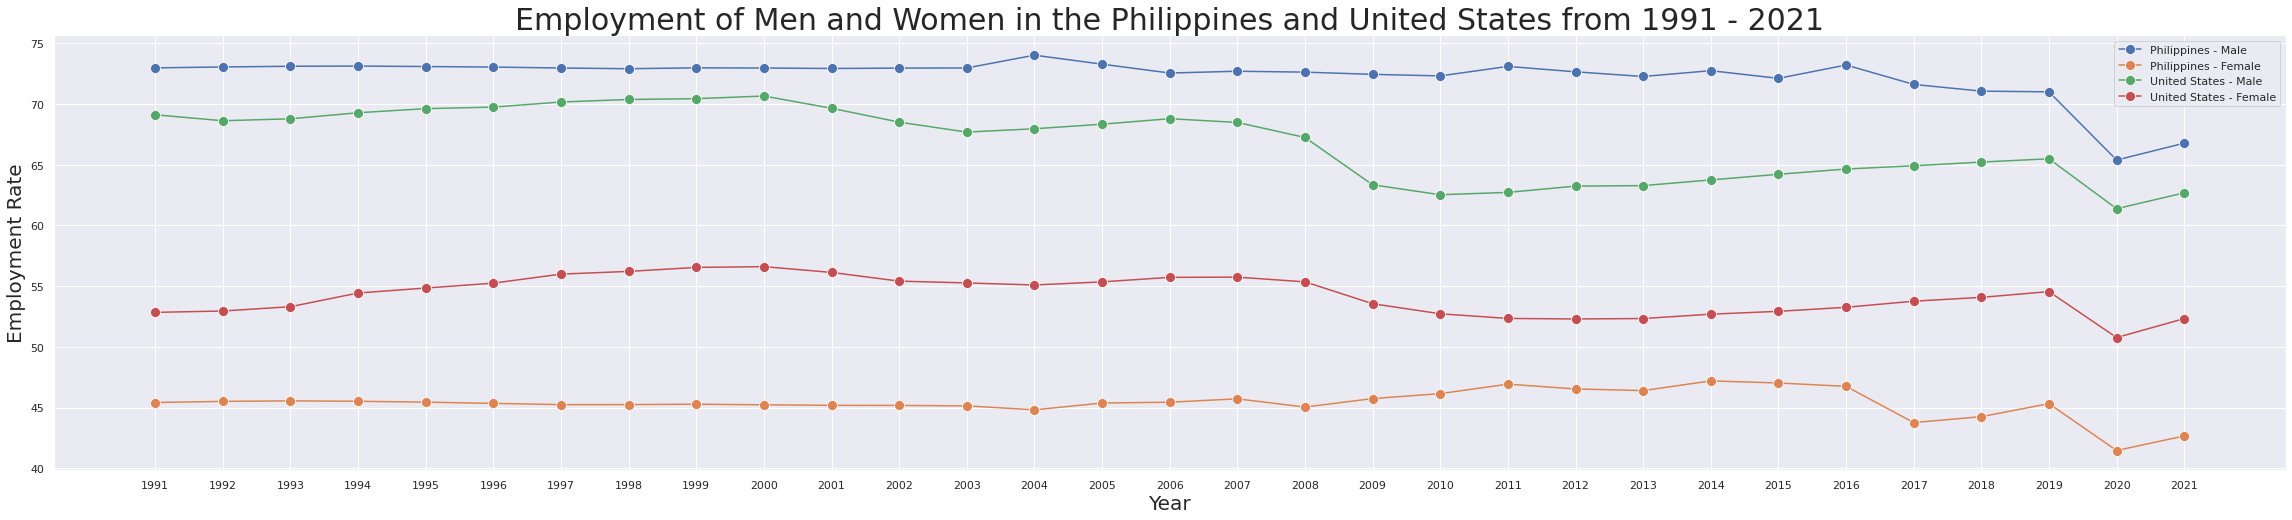

In [ ]:
sns.set(rc = {'figure.figsize':(40,8)})

sns.lineplot(data=employment_new, x=employment_new.year, y=PHL_male_employment.employment,  marker='.', markersize=20, label="Philippines - Male")
sns.lineplot(data=employment_new, x=employment_new.year, y=PHL_female_employment.employment, marker='.', markersize=20, label="Philippines - Female")
sns.lineplot(data=employment_new, x=employment_new.year, y=USA_male_employment.employment, marker='.', markersize=20, label="United States - Male")
sns.lineplot(data=employment_new, x=employment_new.year, y=USA_female_employment.employment, marker='.', markersize=20, label="United States - Female")

plt.xlabel("Year", size=20)
plt.ylabel("Employment Rate", size=20)
plt.title("Employment of Men and Women in the Philippines and United States from 1991 - 2021", size=30)

#### 7.3 Separating Unemployment Rate per Gender and Country

In [ ]:
# Unmployment Rate in the Philippines
PHL_unemployment = unemployment_new[unemployment_new.country_code.str.contains('PHL')]
PHL_female_unemployment = PHL_unemployment[PHL_unemployment.gender.str.contains('FE')]
PHL_male_unemployment = PHL_unemployment[PHL_unemployment.gender.str.contains('MA')]

# Unmployment Rate in the United States
USA_unemployment = unemployment_new[unemployment_new.country_code.str.contains('USA')]
USA_female_unemployment = USA_unemployment[USA_unemployment.gender.str.contains('FE')]
USA_male_unemployment = USA_unemployment[USA_unemployment.gender.str.contains('MA')]

In [ ]:
PHL_female_unemployment.head()

,country_code,gender,year,unemployment
5,PHL,FE,1991,4.069
9,PHL,FE,1992,4.043
13,PHL,FE,1993,3.989
17,PHL,FE,1994,3.920
21,PHL,FE,1995,3.918


In [ ]:
PHL_male_unemployment.head()

,country_code,gender,year,unemployment
7,PHL,MA,1991,3.599
11,PHL,MA,1992,3.571
15,PHL,MA,1993,3.516
19,PHL,MA,1994,3.449
23,PHL,MA,1995,3.442


In [ ]:
USA_female_unemployment.head()

,country_code,gender,year,unemployment
4,USA,FE,1991,6.360
8,USA,FE,1992,7.003
12,USA,FE,1993,6.571
16,USA,FE,1994,6.054
20,USA,FE,1995,5.672


In [ ]:
USA_male_unemployment.head()

,country_code,gender,year,unemployment
6,USA,MA,1991,7.155
10,USA,MA,1992,7.904
14,USA,MA,1993,7.169
18,USA,MA,1994,6.175
22,USA,MA,1995,5.632


#### 7.4 Unmployment Rate Graph

Text(0.5, 1.0, 'Unmployment of Men and Women in the Philippines and United States from 1991 - 2021')

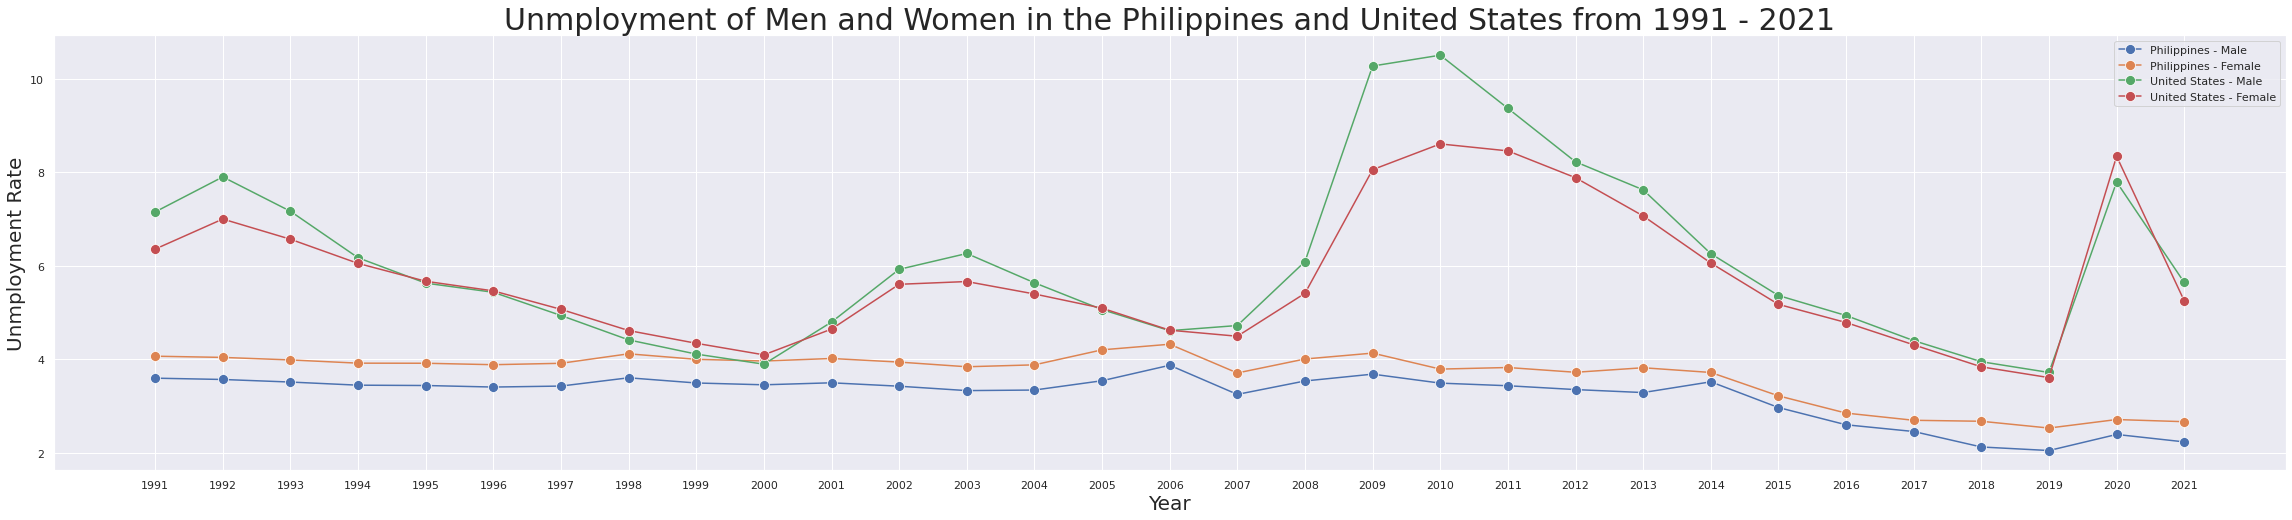

In [ ]:
sns.set(rc = {'figure.figsize':(40,8)})

sns.lineplot(data=unemployment_new, x=unemployment_new.year, y=PHL_male_unemployment.unemployment,  marker='.', markersize=20, label="Philippines - Male")
sns.lineplot(data=unemployment_new, x=unemployment_new.year, y=PHL_female_unemployment.unemployment, marker='.', markersize=20, label="Philippines - Female")
sns.lineplot(data=unemployment_new, x=unemployment_new.year, y=USA_male_unemployment.unemployment, marker='.', markersize=20, label="United States - Male")
sns.lineplot(data=unemployment_new, x=unemployment_new.year, y=USA_female_unemployment.unemployment, marker='.', markersize=20, label="United States - Female")

plt.xlabel("Year", size=20)
plt.ylabel("Unmployment Rate", size=20)
plt.title("Unmployment of Men and Women in the Philippines and United States from 1991 - 2021", size=30)

#### 7.5 Separating Debit Card Ownership per Gender and Country

In [ ]:
# Debit Ownership in the Philippines
PHL_debit = debit_new[debit_new.country_code.str.contains('PHL')]
PHL_female_debit = PHL_debit[PHL_debit.gender.str.contains('FE')]
PHL_male_debit = PHL_debit[PHL_debit.gender.str.contains('MA')]

# Debit Ownership in the United States
USA_debit = debit_new[debit_new.country_code.str.contains('USA')]
USA_female_debit = USA_debit[USA_debit.gender.str.contains('FE')]
USA_male_debit = USA_debit[USA_debit.gender.str.contains('MA')]

In [ ]:
PHL_female_debit.head()

,country_code,gender,year,debit
5,PHL,FE,1991,16.414671
9,PHL,FE,1992,16.414671
13,PHL,FE,1993,16.414671
17,PHL,FE,1994,16.414671
21,PHL,FE,1995,16.414671


In [ ]:
PHL_male_debit.head()

,country_code,gender,year,debit
7,PHL,MA,1991,9.717029
11,PHL,MA,1992,9.717029
15,PHL,MA,1993,9.717029
19,PHL,MA,1994,9.717029
23,PHL,MA,1995,9.717029


In [ ]:
USA_female_debit.head()

,country_code,gender,year,debit
4,USA,FE,1991,65.833359
8,USA,FE,1992,65.833359
12,USA,FE,1993,65.833359
16,USA,FE,1994,65.833359
20,USA,FE,1995,65.833359


In [ ]:
USA_male_debit.head()

,country_code,gender,year,debit
6,USA,MA,1991,77.906349
10,USA,MA,1992,77.906349
14,USA,MA,1993,77.906349
18,USA,MA,1994,77.906349
22,USA,MA,1995,77.906349


#### 7.6 Debit Card Ownership Graph

Text(0.5, 1.0, 'Debit Ownership of Men and Women in the Philippines and United States from 1991 - 2021')

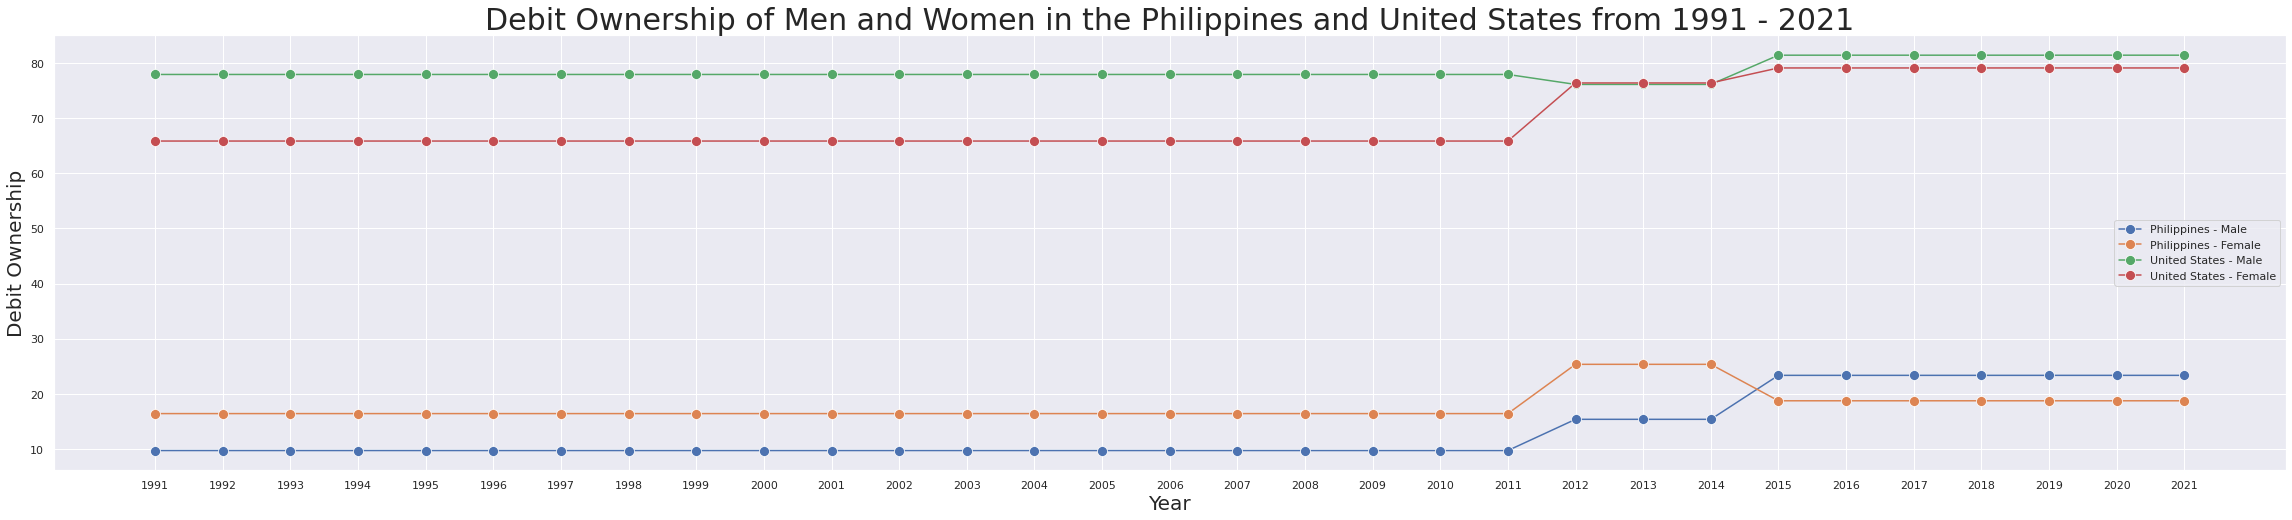

In [ ]:
sns.set(rc = {'figure.figsize':(40,8)})

sns.lineplot(data=debit_new, x=debit_new.year, y=PHL_male_debit.debit,  marker='.', markersize=20, label="Philippines - Male")
sns.lineplot(data=debit_new, x=debit_new.year, y=PHL_female_debit.debit, marker='.', markersize=20, label="Philippines - Female")
sns.lineplot(data=debit_new, x=debit_new.year, y=USA_male_debit.debit, marker='.', markersize=20, label="United States - Male")
sns.lineplot(data=debit_new, x=debit_new.year, y=USA_female_debit.debit, marker='.', markersize=20, label="United States - Female")

plt.xlabel("Year", size=20)
plt.ylabel("Debit Ownership", size=20)
plt.title("Debit Ownership of Men and Women in the Philippines and United States from 1991 - 2021", size=30)

#### 7.7 Separating Bachelor's Degree Graduates Rate per Gender and Country

In [ ]:
# Bachelor's Degree Graduates in the Philippines

PHL_bachelors_education = bachelors_education_new[bachelors_education_new.country_code.str.contains('PHL')]
PHL_female_bachelors_education = PHL_bachelors_education[PHL_bachelors_education.gender.str.contains('FE')]
PHL_male_bachelors_education = PHL_bachelors_education[PHL_bachelors_education.gender.str.contains('MA')]

# Bachelor's Degree Graduates in the United States
USA_bachelors_education = bachelors_education_new[bachelors_education_new.country_code.str.contains('USA')]
USA_female_bachelors_education = USA_bachelors_education[USA_bachelors_education.gender.str.contains('FE')]
USA_male_bachelors_education = USA_bachelors_education[USA_bachelors_education.gender.str.contains('MA')]

# Bachelor's Degree Graduates in India
IND_bachelors_education = bachelors_education_new[bachelors_education_new.country_code.str.contains('IND')]
IND_female_bachelors_education = IND_bachelors_education[IND_bachelors_education.gender.str.contains('FE')]
IND_male_bachelors_education = IND_bachelors_education[IND_bachelors_education.gender.str.contains('MA')]

# Bachelor's Degree Graduates in the United Kingdom
GBR_bachelors_education = bachelors_education_new[bachelors_education_new.country_code.str.contains('GBR')]
GBR_female_bachelors_education = GBR_bachelors_education[GBR_bachelors_education.gender.str.contains('FE')]
GBR_male_bachelors_education = GBR_bachelors_education[GBR_bachelors_education.gender.str.contains('MA')]

In [ ]:
PHL_female_bachelors_education.head()

,country_code,gender,year,college graduate
5,PHL,FE,1991,18.0453
9,PHL,FE,1992,18.0453
13,PHL,FE,1993,18.0453
17,PHL,FE,1994,18.0453
21,PHL,FE,1995,18.0453


In [ ]:
PHL_male_bachelors_education.head()

,country_code,gender,year,college graduate
7,PHL,MA,1991,14.79566
11,PHL,MA,1992,14.79566
15,PHL,MA,1993,14.79566
19,PHL,MA,1994,14.79566
23,PHL,MA,1995,14.79566


In [ ]:
USA_female_bachelors_education.head()

,country_code,gender,year,college graduate
4,USA,FE,1991,31.39076
8,USA,FE,1992,31.39076
12,USA,FE,1993,31.39076
16,USA,FE,1994,31.39076
20,USA,FE,1995,31.39076


In [ ]:
USA_male_bachelors_education.head()

,country_code,gender,year,college graduate
6,USA,MA,1991,31.953091
10,USA,MA,1992,31.953091
14,USA,MA,1993,31.953091
18,USA,MA,1994,31.953091
22,USA,MA,1995,31.953091


In [ ]:
IND_female_bachelors_education.head()

,country_code,gender,year,college graduate


In [ ]:
IND_male_bachelors_education.head()

,country_code,gender,year,college graduate


In [ ]:
GBR_female_bachelors_education.head()

,country_code,gender,year,college graduate


In [ ]:
GBR_male_bachelors_education.head()

,country_code,gender,year,college graduate


#### 7.8 Bachelor's Degree Graduates Rate Graph

Text(0.5, 1.0, "Men and Women Bachelor's Degree Graduates in the Philippines and United States from 1991 - 2021")

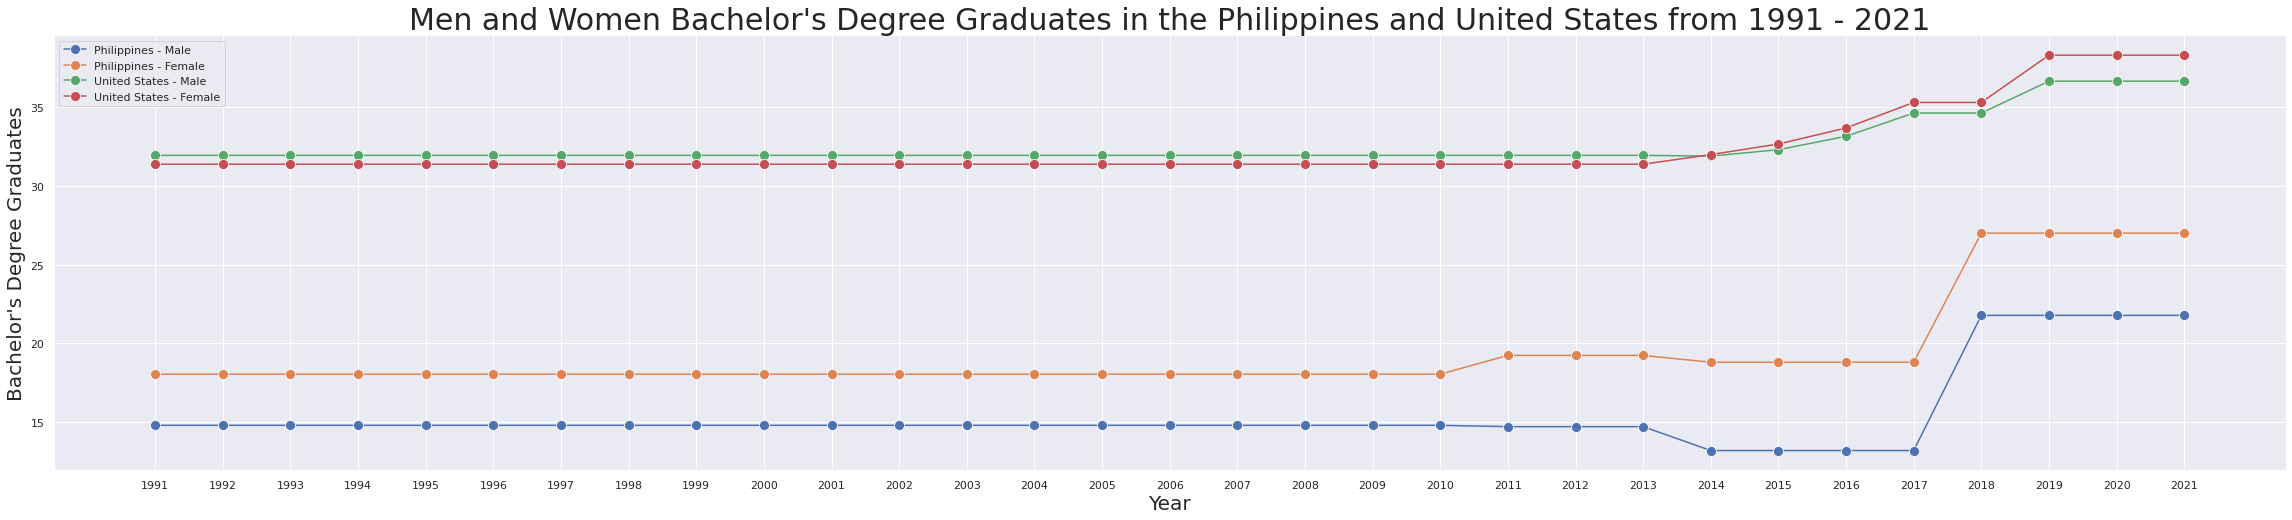

In [ ]:
sns.set(rc = {'figure.figsize':(40,8)})

sns.lineplot(data=bachelors_education_new, x=bachelors_education_new.year, y=PHL_male_bachelors_education['college graduate'],  marker='.', markersize=20, label="Philippines - Male")
sns.lineplot(data=bachelors_education_new, x=bachelors_education_new.year, y=PHL_female_bachelors_education['college graduate'], marker='.', markersize=20, label="Philippines - Female")
sns.lineplot(data=bachelors_education_new, x=bachelors_education_new.year, y=USA_male_bachelors_education['college graduate'], marker='.', markersize=20, label="United States - Male")
sns.lineplot(data=bachelors_education_new, x=bachelors_education_new.year, y=USA_female_bachelors_education['college graduate'], marker='.', markersize=20, label="United States - Female")

plt.xlabel("Year", size=20)
plt.ylabel("Bachelor's Degree Graduates", size=20)
plt.title("Men and Women Bachelor's Degree Graduates in the Philippines and United States from 1991 - 2021", size=30)

#### **8. Export the Cleaned Data Set to CSV**

In [ ]:
employment_new.to_csv('./cleaned_data/cleaned_employment.csv', index=False)
unemployment_new.to_csv('./cleaned_data/cleaned_unemployment.csv', index=False)
debit_new.to_csv('./cleaned_data/cleaned_debit.csv', index=False)
bachelors_education_new.to_csv('./cleaned_data/cleaned_bacherlors_education.csv', index=False)

# **Activity 4**

##  **II. Data Integration**

#### **1. Merge all the Data needed in 1 Table**

In [ ]:
employment_unemployment_merged = employment_new.merge(unemployment_new)
employment_unemployment_merged

,country_code,gender,year,employment,unemployment
0,USA,FE,1991,52.840000,6.360
1,PHL,FE,1991,45.417999,4.069
2,USA,MA,1991,69.114998,7.155
3,PHL,MA,1991,72.975998,3.599
4,USA,FE,1992,52.953999,7.003
...,...,...,...,...,...
119,PHL,MA,2020,65.387001,2.395
120,USA,FE,2021,52.326000,5.253
121,PHL,FE,2021,42.666000,2.668
122,USA,MA,2021,62.686001,5.646


#### **2. Pivot View(s)**

#### 2.1 Table

In [ ]:
employment_unemployment_pv_meanval_cc = pd.pivot_table(data=employment_unemployment_merged,
                                                                 index=['country_code'],
                                                                 columns=['gender'],
                                                                 values=['employment','unemployment'],
                                                                 aggfunc='mean'
                                                                )
employment_unemployment_pv_meanval_cc

employment            unemployment          
gender               FE         MA           FE        MA
country_code                                             
PHL           45.351387  72.287773     3.682419  3.239129
USA           54.215805  66.802582     5.731871  6.066645

#### 2.2 Plot

##### 2.2.1 Employment-Unemployment

<AxesSubplot:xlabel='country_code'>

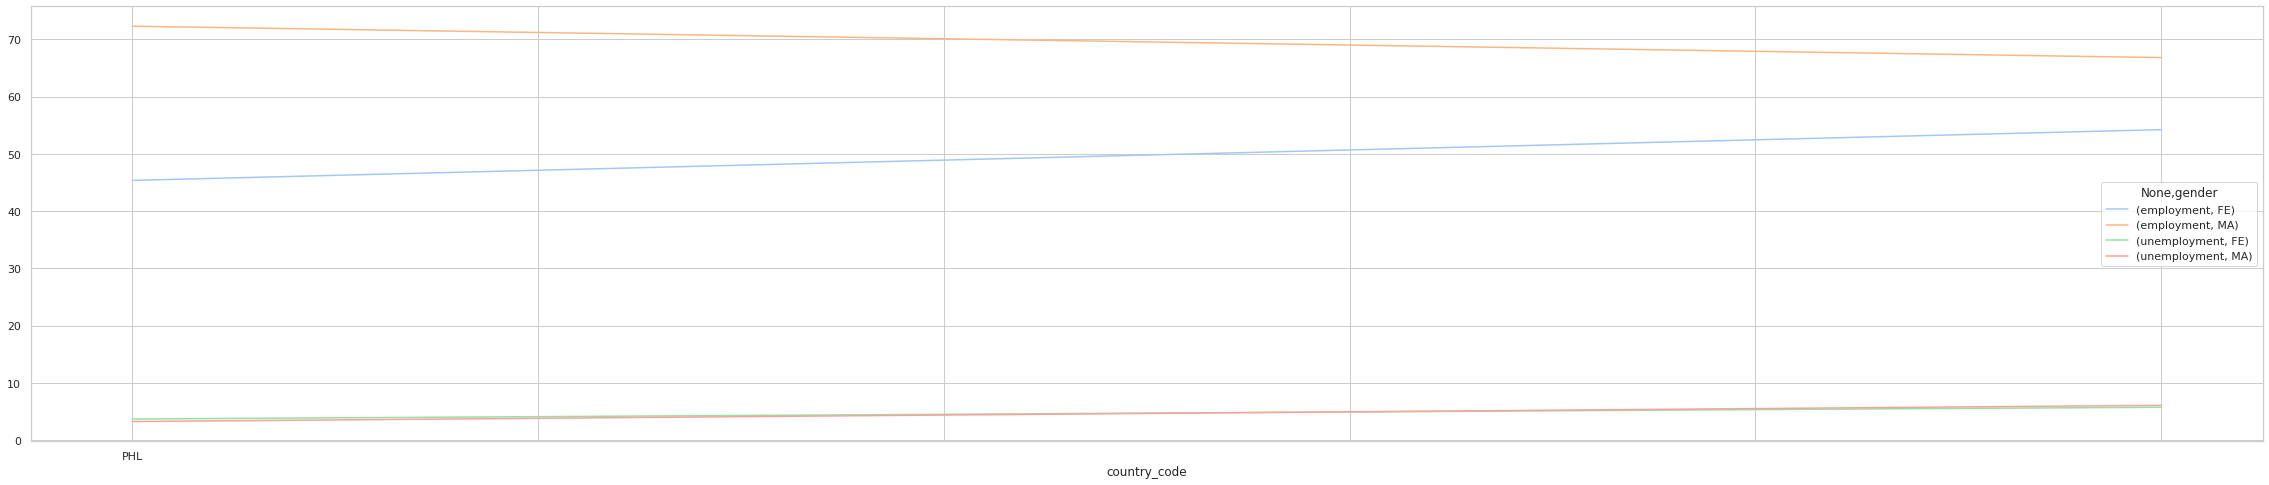

In [ ]:
sns.set_theme(style="whitegrid", palette="pastel")
employment_unemployment_pv_meanval_cc.plot()

#### 2.3 Aggregation (Percentage Values)

In [ ]:
employment_unemployment_pv_percetageval = pd.pivot_table(data=employment_unemployment_merged,
                                                                 index=['country_code'],
                                                                 columns=['gender'],
                                                                 values=['employment','unemployment'],
                                                                 aggfunc=sum
                                                                ).apply(lambda x: 100 * x / float(x.sum()))
employment_unemployment_pv_percetageval

employment            unemployment           
gender               FE         MA           FE         MA
country_code                                              
PHL           45.548523  51.971809    39.115208  34.807732
USA           54.451477  48.028198    60.884789  65.192268

##  **III. Data Transformation**

#### **3. Normalization**

In [ ]:
employment_unemployment_merged['employment'] = employment_unemployment_merged['employment'].div(100)
employment_unemployment_merged['unemployment'] = employment_unemployment_merged['unemployment'].div(100)
employment_unemployment_merged
print("Gender Labels:", gender_labels)
print("Country Code Labels:", country_code_labels)

,country_code,gender,year,employment,unemployment
0,USA,FE,1991,0.52840,0.06360
1,PHL,FE,1991,0.45418,0.04069
2,USA,MA,1991,0.69115,0.07155
3,PHL,MA,1991,0.72976,0.03599
4,USA,FE,1992,0.52954,0.07003
...,...,...,...,...,...
119,PHL,MA,2020,0.65387,0.02395
120,USA,FE,2021,0.52326,0.05253
121,PHL,FE,2021,0.42666,0.02668
122,USA,MA,2021,0.62686,0.05646


#### **4. Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoded_merged = employment_unemployment_merged

def encode(df_column):
  le = LabelEncoder()
  df_column = le.fit_transform(df_column)
  labels = list(zip(range(len(le.classes_)), le.classes_))
  return labels, df_column

gender_labels, encoded_merged['gender'] = encode(encoded_merged['gender']) # gender
country_code_labels, encoded_merged['country_code'] = encode(encoded_merged['country_code'])

encoded_merged.head(20)

,country_code,gender,year,employment,unemployment
0,1,0,1991,0.52840,0.06360
1,0,0,1991,0.45418,0.04069
2,1,1,1991,0.69115,0.07155
3,0,1,1991,0.72976,0.03599
4,1,0,1992,0.52954,0.07003
5,0,0,1992,0.45511,0.04043
6,1,1,1992,0.68622,0.07904
7,0,1,1992,0.73052,0.03571
8,1,0,1993,0.53308,0.06571
9,0,0,1993,0.45553,0.03989


##  **IV. Data Reduction (optional)**

#### **-- Not Applicable --**

##  **V. Data Mining Function and Implementation**

In [ ]:
# Data manipulation
# ==============================================================================
import numpy as np
import pandas as pd

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
%matplotlib inline

# Modeling and Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregMultiOutput import ForecasterAutoregMultiOutput
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster

from joblib import dump, load

# Warnings configuration
# ==============================================================================
import warnings
# warnings.filterwarnings('ignore')

#### **5. Loading our Data**

In [ ]:
employment_phl = encoded_merged[encoded_merged.country_code.astype('str').str.contains('0')]
employment_usa = encoded_merged[encoded_merged.country_code.astype('str').str.contains('1')]

In [ ]:
# Employment in the Philippines - Female
employment_phl_f = employment_phl[employment_phl.gender.astype('str').str.contains('0')]
data_ph_f = employment_phl_f
data_ph_f = data_ph_f.set_index('year')

In [ ]:
# Employment in the Philippines - Male
employment_phl_m = employment_phl[employment_phl.gender.astype('str').str.contains('1')]
data_ph_m = employment_phl_m
data_ph_m = data_ph_m.set_index('year')

In [ ]:
# Employment in USA - Female
employment_usa_f = employment_usa[employment_usa.gender.astype('str').str.contains('0')]
data_usa_f = employment_usa_f
data_usa_f = data_usa_f.set_index('year')

In [ ]:
# Employment in USA - Female
employment_usa_m = employment_usa[employment_usa.gender.astype('str').str.contains('1')]
data_usa_m = employment_usa_m
data_usa_m = data_usa_m.set_index('year')

#### **6. Split data into train-test**

##### 6.1 Philippines Female Employment

matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Train dates : 1991 --- 2016  (n=26)
Test dates  : 2017 --- 2021  (n=5)


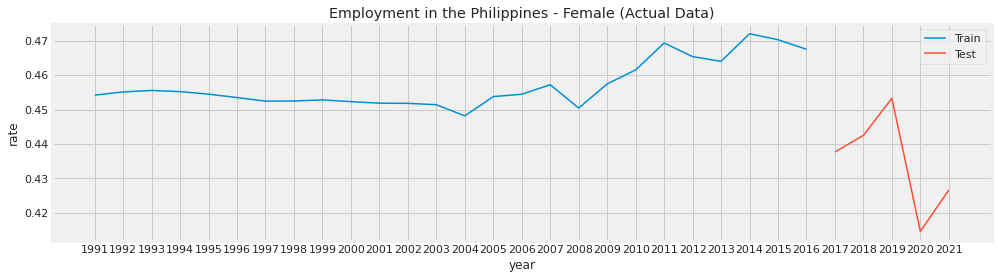

In [ ]:
steps = 5
data_ph_f_train = data_ph_f[:-steps]
data_ph_f_test  = data_ph_f[-steps:]

print(f"Train dates : {data_ph_f_train.index.min()} --- {data_ph_f_train.index.max()}  (n={len(data_ph_f_train)})")
print(f"Test dates  : {data_ph_f_test.index.min()} --- {data_ph_f_test.index.max()}  (n={len(data_ph_f_test)})")

fig, ax=plt.subplots(figsize=(15, 4))
plt.title('Employment in the Philippines - Female (Actual Data)')
plt.xlabel('year')
plt.ylabel('rate')
ax.plot(data_ph_f_train.index, data_ph_f_train['employment'], label='Train')
ax.plot(data_ph_f_test.index, data_ph_f_test['employment'], label='Test')
ax.legend();

##### 6.2 Philippines Male Employment

matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Train dates : 1991 --- 2016  (n=26)
Test dates  : 2017 --- 2021  (n=5)


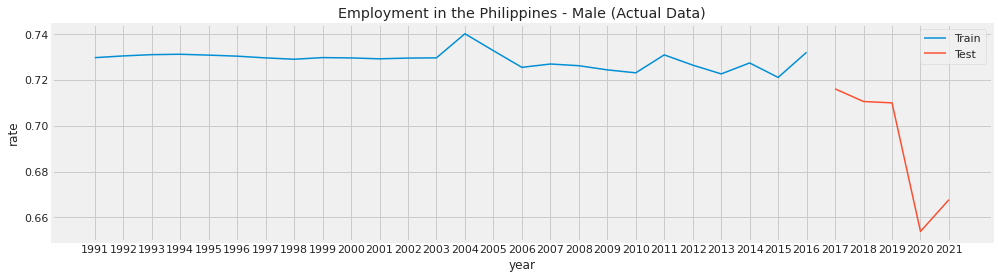

In [ ]:
steps = 5
data_ph_m_train = data_ph_m[:-steps]
data_ph_m_test  = data_ph_m[-steps:]

print(f"Train dates : {data_ph_m_train.index.min()} --- {data_ph_m_train.index.max()}  (n={len(data_ph_m_train)})")
print(f"Test dates  : {data_ph_m_test.index.min()} --- {data_ph_m_test.index.max()}  (n={len(data_ph_m_test)})")

fig, ax=plt.subplots(figsize=(15, 4))
plt.title('Employment in the Philippines - Male (Actual Data)')
plt.xlabel('year')
plt.ylabel('rate')
ax.plot(data_ph_m_train.index, data_ph_m_train['employment'], label='Train')
ax.plot(data_ph_m_test.index, data_ph_m_test['employment'], label='Test')
ax.legend();

##### 6.3 United States Female Employment

matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Train dates : 1991 --- 2016  (n=26)
Test dates  : 2017 --- 2021  (n=5)


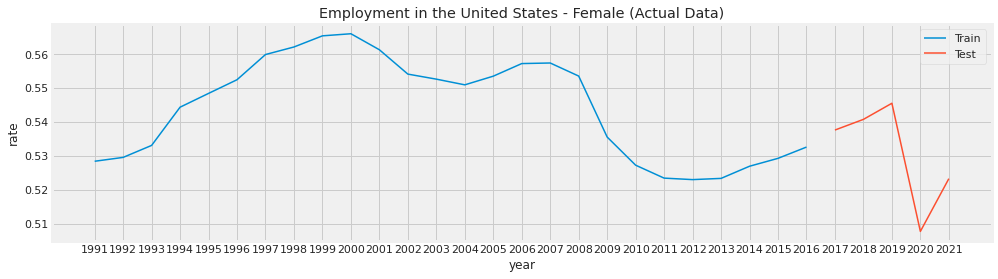

In [ ]:
steps = 5
data_usa_f_train = data_usa_f[:-steps]
data_usa_f_test  = data_usa_f[-steps:]

print(f"Train dates : {data_usa_f_train.index.min()} --- {data_usa_f_train.index.max()}  (n={len(data_usa_f_train)})")
print(f"Test dates  : {data_usa_f_test.index.min()} --- {data_usa_f_test.index.max()}  (n={len(data_usa_f_test)})")

fig, ax=plt.subplots(figsize=(15, 4))
plt.title('Employment in the United States - Female (Actual Data)')
plt.xlabel('year')
plt.ylabel('rate')
ax.plot(data_usa_f_train.index, data_usa_f_train['employment'], label='Train')
ax.plot(data_usa_f_test.index, data_usa_f_test['employment'], label='Test')
ax.legend();

##### 6.4 United States Male Employment

matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


Train dates : 1991 --- 2016  (n=26)
Test dates  : 2017 --- 2021  (n=5)


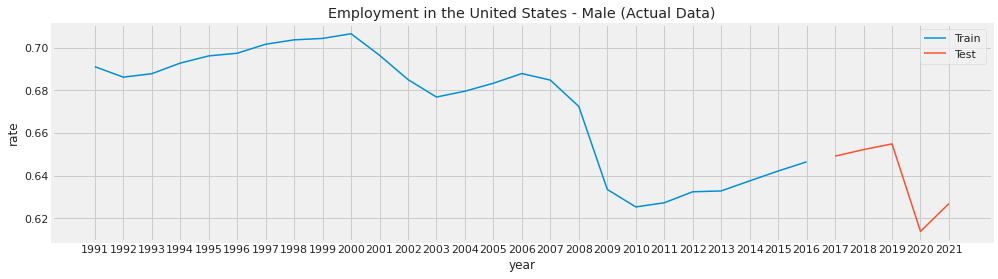

In [ ]:
steps = 5
data_usa_m_train = data_usa_m[:-steps]
data_usa_m_test  = data_usa_m[-steps:]

print(f"Train dates : {data_usa_m_train.index.min()} --- {data_usa_m_train.index.max()}  (n={len(data_usa_m_train)})")
print(f"Test dates  : {data_usa_m_test.index.min()} --- {data_usa_m_test.index.max()}  (n={len(data_usa_m_test)})")

fig, ax=plt.subplots(figsize=(15, 4))
plt.title('Employment in the United States - Male (Actual Data)')
plt.xlabel('year')
plt.ylabel('rate')
ax.plot(data_usa_m_train.index, data_usa_m_train['employment'], label='Train')
ax.plot(data_usa_m_test.index, data_usa_m_test['employment'], label='Test')
ax.legend();

In [ ]:
# Plotting Unemployment Trends can be done in the future

#### **7. Create and Train our Forecaster**

##### 7.1 Philippines - Female Employment Forecaster

In [ ]:
forecaster_ph_f = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags = 6
                )

forecaster_ph_f.fit(y=data_ph_f_train['employment'])
forecaster_ph_f

/home/njane/.local/lib/python3.10/site-packages/skforecast/utils/utils.py:256: UserWarning: `y` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(
/home/njane/.local/lib/python3.10/site-packages/skforecast/utils/utils.py:256: UserWarning: `y` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(


ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [1 2 3 4 5 6] 
Window size: 6 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 25] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2022-06-28 18:37:44 
Last fit date: 2022-06-28 18:37:45 
Skforecast version: 0.4.3 

##### 7.2 Philippines - Male Employment Forecaster

In [ ]:
forecaster_ph_m = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags = 6
                )

forecaster_ph_m.fit(y=data_ph_m_train['employment'])
forecaster_ph_m

/home/njane/.local/lib/python3.10/site-packages/skforecast/utils/utils.py:256: UserWarning: `y` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(
/home/njane/.local/lib/python3.10/site-packages/skforecast/utils/utils.py:256: UserWarning: `y` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(


ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [1 2 3 4 5 6] 
Window size: 6 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 25] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2022-06-28 18:37:45 
Last fit date: 2022-06-28 18:37:45 
Skforecast version: 0.4.3 

##### 7.3 United States - Female Employment Forecaster

In [ ]:
forecaster_usa_f = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags = 6
                )

forecaster_usa_f.fit(y=data_usa_f_train['employment'])
forecaster_usa_f

/home/njane/.local/lib/python3.10/site-packages/skforecast/utils/utils.py:256: UserWarning: `y` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(
/home/njane/.local/lib/python3.10/site-packages/skforecast/utils/utils.py:256: UserWarning: `y` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(


ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [1 2 3 4 5 6] 
Window size: 6 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 25] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2022-06-28 18:37:45 
Last fit date: 2022-06-28 18:37:45 
Skforecast version: 0.4.3 

##### 7.4 United States - Male Employment Forecaster

In [ ]:
forecaster_usa_m = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags = 6
                )

forecaster_usa_m.fit(y=data_usa_m_train['employment'])
forecaster_usa_m

/home/njane/.local/lib/python3.10/site-packages/skforecast/utils/utils.py:256: UserWarning: `y` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(
/home/njane/.local/lib/python3.10/site-packages/skforecast/utils/utils.py:256: UserWarning: `y` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.
  warnings.warn(


ForecasterAutoreg 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [1 2 3 4 5 6] 
Window size: 6 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 25] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 123, 'verbose': 0, 'warm_start': False} 
Creation date: 2022-06-28 18:37:45 
Last fit date: 2022-06-28 18:37:45 
Skforecast version: 0.4.3 

#### **8. Predictions**

##### 9.1 Female Employment in the Philippines Predictions

In [ ]:
steps = 5
predictions_ph_f = forecaster_ph_f.predict(steps=steps)
predictions_ph_f.head(5)

26    0.468720
27    0.468987
28    0.468565
29    0.468565
30    0.468638
Name: pred, dtype: float64

##### 9.2 Male Employment in USA Predictions

In [ ]:
predictions_ph_m = forecaster_ph_m.predict(steps=steps)
predictions_ph_m.head(5)

26    0.726895
27    0.727156
28    0.726426
29    0.726473
30    0.728213
Name: pred, dtype: float64

##### 9.3 Female Employment in USA Predictions

In [ ]:
predictions_usa_f = forecaster_usa_f.predict(steps=steps)
predictions_usa_f.head(5)

26    0.529310
27    0.528787
28    0.528680
29    0.528532
30    0.528174
Name: pred, dtype: float64

##### 9.4 Male Employment in USA Predictions

In [ ]:
predictions_usa_m = forecaster_usa_m.predict(steps=steps)
predictions_usa_m.head(5)

26    0.641114
27    0.639979
28    0.639979
29    0.639979
30    0.639979
Name: pred, dtype: float64

#### **9. Plots**

##### 9.1 Plot of Female Employment Rate in the Philippines Prediction and Actual Data

matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


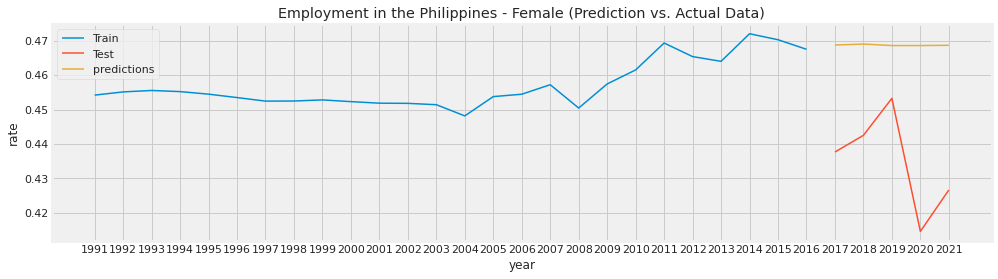

In [ ]:
fig, ax = plt.subplots(figsize=(15, 4))
ax.plot(data_ph_f_train.index, data_ph_f_train['employment'], label='Train')
ax.plot(data_ph_f_test.index, data_ph_f_test['employment'], label='Test')
predictions_ph_f.plot(ax=ax, label='predictions')
plt.title('Employment in the Philippines - Female (Prediction vs. Actual Data)')
plt.xlabel('year')
plt.ylabel('rate')
ax.legend();

##### 9.1 Plot of Male Employment Rate in the Philippines Prediction and Actual Data

matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


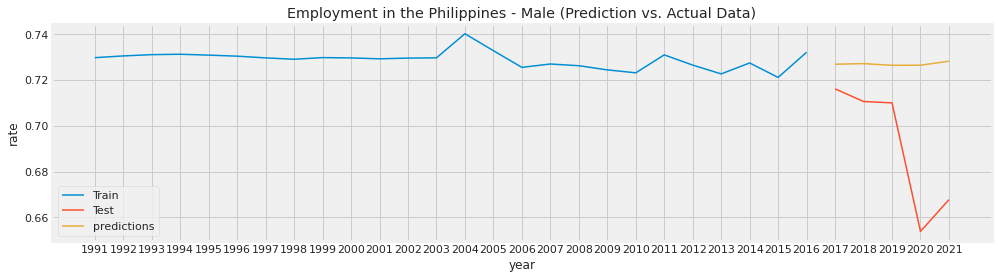

In [ ]:
fig, ax = plt.subplots(figsize=(15, 4))
ax.plot(data_ph_m_train.index, data_ph_m_train['employment'], label='Train')
ax.plot(data_ph_m_test.index, data_ph_m_test['employment'], label='Test')
predictions_ph_m.plot(ax=ax, label='predictions')
plt.title('Employment in the Philippines - Male (Prediction vs. Actual Data)')
plt.xlabel('year')
plt.ylabel('rate')
ax.legend();

##### 9.1 Plot of Female Employment Rate in the United States Prediction and Actual Data

matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


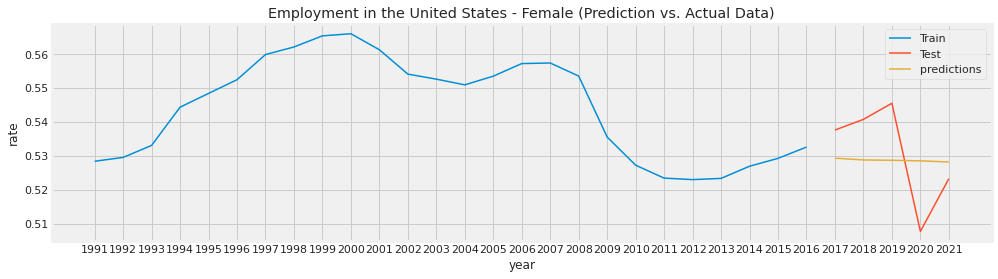

In [ ]:
fig, ax = plt.subplots(figsize=(15, 4))
ax.plot(data_usa_f_train.index, data_usa_f_train['employment'], label='Train')
ax.plot(data_usa_f_test.index, data_usa_f_test['employment'], label='Test')
predictions_usa_f.plot(ax=ax, label='predictions')
plt.title('Employment in the United States - Female (Prediction vs. Actual Data)')
plt.xlabel('year')
plt.ylabel('rate')
ax.legend();

##### 9.1 Plot of Male Employment Rate in the United States Prediction and Actual Data

matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
matplotlib.category INFO  Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


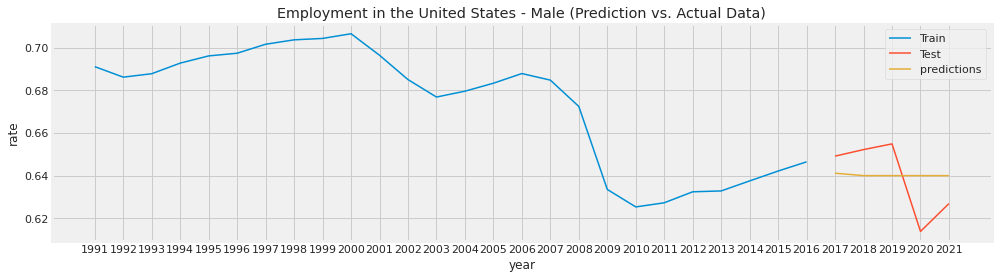

In [ ]:
fig, ax = plt.subplots(figsize=(15, 4))
ax.plot(data_usa_m_train.index, data_usa_m_train['employment'], label='Train')
ax.plot(data_usa_m_test.index, data_usa_m_test['employment'], label='Test')
predictions_usa_m.plot(ax=ax, label='predictions')
plt.title('Employment in the United States - Male (Prediction vs. Actual Data)')
plt.xlabel('year')
plt.ylabel('rate')
ax.legend();